In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

In [5]:
!pip install pygad

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
df= pd.read_csv('/content/drive/MyDrive/train data.csv')

In [8]:
df.shape

(50000, 16)

In [9]:
df.head(5)

ID           Name  Age  Gender Blood Type Medical Condition  \
0   1  Bobby JacksOn   27  Female         O-            Asthma   
1   2   LesLie TErRy   68  Female         O-            Cancer   
2   3    DaNnY sMitH   21  Female         A+      Hypertension   
3   4   andrEw waTtS   91    Male        AB-          Diabetes   
4   5  adrIENNE bEll   52  Female         A+          Diabetes   

  Date of Admission            Doctor         Hospital Insurance Provider  \
0        06/06/2022  Mark Hartman Jr.  Sons and Miller              Cigna   
1        19/11/2021  Angela Contreras      White-White              Cigna   
2        05/03/2022        David Ruiz  Group Middleton           Medicare   
3        06/04/2020    Jenny Griffith  Morris-Arellano         Blue Cross   
4        31/12/2022     Cynthia Scott   Williams-Davis         Blue Cross   

   Billing Amount  Room Number Admission Type Discharge Date   Medication  \
0     2625.980554          379       Elective     18/08/2022    Ibuprofen   
1     1471.387317          113       Elective     20/11/2021    Ibuprofen   
2     5131.488104          154      Emergency     16/05/2022  Paracetamol   
3     8972.793157          293         Urgent     26/04/2020    Ibuprofen   
4     2015.522684          265      Emergency     11/02/2023   Penicillin   

   Test Results  
0        Normal  
1  Inconclusive  
2        Normal  
3      Abnormal  
4      Abnormal

In [10]:
(df.isnull().sum()/df.shape[0])*100

ID                    0.000
Name                  0.000
Age                   0.000
Gender                0.000
Blood Type            6.130
Medical Condition     0.000
Date of Admission     0.000
Doctor                1.608
Hospital              1.918
Insurance Provider    0.586
Billing Amount        1.448
Room Number           0.000
Admission Type        0.362
Discharge Date        0.000
Medication            0.000
Test Results          0.000
dtype: float64

In [11]:
df.describe()

ID           Age  Billing Amount   Room Number
count  50000.000000  50000.000000    49276.000000  50000.000000
mean   25000.500000     45.863700     5397.314987    282.999980
std    14433.901067     24.416119     3240.601901    109.993534
min        1.000000      0.000000     -995.211704     50.000000
25%    12500.750000     26.000000     2645.811489    203.000000
50%    25000.500000     45.000000     5313.507889    286.000000
75%    37500.250000     65.000000     8027.205893    370.000000
max    50000.000000    100.000000    12635.764460    500.000000

In [12]:
df['Blood Type'].fillna(df['Blood Type'].mode()[0], inplace=True)

<ipython-input-12-7c4c90515c30>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Blood Type'].fillna(df['Blood Type'].mode()[0], inplace=True)


In [13]:
df['Doctor'].fillna(df['Doctor'].mode()[0], inplace=True)
df['Hospital'].fillna(df['Hospital'].mode()[0], inplace=True)
df['Insurance Provider'].fillna(df['Insurance Provider'].mode()[0], inplace=True)
df['Billing Amount'].fillna(df['Billing Amount'].mean(), inplace=True)
df.dropna(subset=['Admission Type'], inplace=True)

<ipython-input-13-40bcb1b89beb>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Doctor'].fillna(df['Doctor'].mode()[0], inplace=True)
<ipython-input-13-40bcb1b89beb>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)',

In [14]:
df.isnull().any(axis=1).sum()

np.int64(0)

In [15]:
(df.isnull().sum()/df.shape[0])*100

ID                    0.0
Name                  0.0
Age                   0.0
Gender                0.0
Blood Type            0.0
Medical Condition     0.0
Date of Admission     0.0
Doctor                0.0
Hospital              0.0
Insurance Provider    0.0
Billing Amount        0.0
Room Number           0.0
Admission Type        0.0
Discharge Date        0.0
Medication            0.0
Test Results          0.0
dtype: float64

In [16]:
df.duplicated().sum()

np.int64(0)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49819 entries, 0 to 49999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  49819 non-null  int64  
 1   Name                49819 non-null  object 
 2   Age                 49819 non-null  int64  
 3   Gender              49819 non-null  object 
 4   Blood Type          49819 non-null  object 
 5   Medical Condition   49819 non-null  object 
 6   Date of Admission   49819 non-null  object 
 7   Doctor              49819 non-null  object 
 8   Hospital            49819 non-null  object 
 9   Insurance Provider  49819 non-null  object 
 10  Billing Amount      49819 non-null  float64
 11  Room Number         49819 non-null  int64  
 12  Admission Type      49819 non-null  object 
 13  Discharge Date      49819 non-null  object 
 14  Medication          49819 non-null  object 
 15  Test Results        49819 non-null  object 
dtypes: float6

In [18]:
df.describe()

ID           Age  Billing Amount   Room Number
count  49819.000000  49819.000000    49819.000000  49819.000000
mean   25035.339268     45.866196     5398.035591    282.975491
std    14414.777877     24.417110     3216.952203    109.969155
min        1.000000      0.000000     -993.384587     50.000000
25%    12557.500000     26.000000     2691.938361    203.000000
50%    25040.000000     45.000000     5391.023350    286.000000
75%    37512.500000     65.000000     7988.504543    370.000000
max    50000.000000    100.000000    12635.764460    500.000000

In [19]:
df[df['Billing Amount'] < 0]

ID             Name  Age  Gender Blood Type Medical Condition  \
573      574   NiCole FraNCIS   44    Male        AB+           Obesity   
990      991    joSHuA muRRay   17  Female         A-           Obesity   
1068    1069        KYle REEd   18  Female         B-          Diabetes   
1387    1388   rOBert ROBeRtS   27  Female         B-          Diabetes   
1552    1553     DaVID FlorEs    6    Male         B-          Diabetes   
...      ...              ...  ...     ...        ...               ...   
49073  49074    olivia WaGNER   60    Male         O-          Diabetes   
49103  49104       trOy DavIs   42    Male        AB-         Arthritis   
49420  49421  ANdrEw bARR jR.   21  Female         O-           Obesity   
49517  49518     ashley SmITH   40    Male         A-      Hypertension   
49767  49768     JOANNa LOPEZ   38    Male         B-            Cancer   

      Date of Admission             Doctor                    Hospital  \
573          13/05/2024        Cindy White              and Sons Smith   
990          21/11/2022      Cynthia Scott             Sons and Miller   
1068         26/05/2021         Lucas Cole                 Houston PLC   
1387         02/05/2024     Matthew Walker              and Sons Smith   
1552         15/11/2020        Wendy Glenn                   Lopez PLC   
...                 ...                ...                         ...   
49073        23/08/2019   Kenneth Fletcher              Padilla-Walker   
49103        27/01/2020  Erin Henderson MD                  LLC Martin   
49420        11/10/2024      Erika Jackson              Espinoza-Stone   
49517        21/09/2022        Laura Myers  Torres, and Harrison Jones   
49767        10/11/2023       Emma Allison    Nelson Walker Myers, and   

      Insurance Provider  Billing Amount  Room Number Admission Type  \
573                Aetna     -580.891573          248         Urgent   
990           Blue Cross     -105.161711          208         Urgent   
1068          Blue Cross     -226.328250          139      Emergency   
1387               Cigna     -721.277219          239         Urgent   
1552            Medicare     -354.424690          234         Urgent   
...                  ...             ...          ...            ...   
49073           Medicare     -986.393510          253         Urgent   
49103              Cigna     -322.447170          327      Emergency   
49420         Blue Cross     -344.973224          232         Urgent   
49517              Cigna     -578.996620          219       Elective   
49767              Aetna     -351.380402           99       Elective   

      Discharge Date   Medication  Test Results  
573       26/05/2024    Ibuprofen  Inconclusive  
990       23/01/2023      Lipitor      Abnormal  
1068      11/07/2021      Aspirin  Inconclusive  
1387      22/06/2024      Aspirin  Inconclusive  
1552      25/01/2021    Ibuprofen  Inconclusive  
...              ...          ...           ...  
49073     16/11/2019  Paracetamol  Inconclusive  
49103     22/02/2020   Penicillin  Inconclusive  
49420     04/11/2024      Lipitor      Abnormal  
49517     02/10/2022  Paracetamol  Inconclusive  
49767     14/11/2023      Lipitor  Inconclusive  

[246 rows x 16 columns]

In [20]:
positive_mean = df[df['Billing Amount'] >= 0]['Billing Amount'].mean()
df['Billing Amount'] = df['Billing Amount'].apply(lambda x: positive_mean if x < 0 else x)

In [21]:
df[df['Billing Amount'] < 0]

Empty DataFrame
Columns: [ID, Name, Age, Gender, Blood Type, Medical Condition, Date of Admission, Doctor, Hospital, Insurance Provider, Billing Amount, Room Number, Admission Type, Discharge Date, Medication, Test Results]
Index: []

In [22]:
df.drop('Name', axis=1, inplace=True)

In [23]:
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'], dayfirst=True)
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'], dayfirst=True)
df['Length_of_Stay'] = (df['Discharge Date'] - df['Date of Admission']).dt.days
df.drop(['Date of Admission', 'Discharge Date'], axis=1, inplace=True)

In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Admission Type'] = le.fit_transform(df['Admission Type'])
df['Test Results'] = le.fit_transform(df['Test Results'])

In [25]:
df = pd.get_dummies(df, columns=['Blood Type'], drop_first=True, dtype=int)
df = pd.get_dummies(df, columns=['Medical Condition'], drop_first=True, dtype=int)
df = pd.get_dummies(df, columns=['Insurance Provider'], drop_first=True, dtype=int)

In [26]:
freq = df['Hospital'].value_counts()
df['Hospital_encoded'] = df['Hospital'].map(freq)
df.drop('Hospital', axis=1, inplace=True)
freq3= df['Doctor'].value_counts()
df['Doctor_encoded'] = df['Doctor'].map(freq3)
df.drop('Doctor', axis=1, inplace=True)

In [27]:
freq4 = df['Medication'].value_counts()
freq4

Medication
Penicillin     12218
Lipitor         9808
Paracetamol     9520
Ibuprofen       9226
Aspirin         9047
Name: count, dtype: int64

In [28]:
df = pd.get_dummies(df, columns=['Medication'], drop_first=True, dtype=int)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49819 entries, 0 to 49999
Data columns (total 30 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   49819 non-null  int64  
 1   Age                                  49819 non-null  int64  
 2   Gender                               49819 non-null  int64  
 3   Billing Amount                       49819 non-null  float64
 4   Room Number                          49819 non-null  int64  
 5   Admission Type                       49819 non-null  int64  
 6   Test Results                         49819 non-null  int64  
 7   Length_of_Stay                       49819 non-null  int64  
 8   Blood Type_A-                        49819 non-null  int64  
 9   Blood Type_AB+                       49819 non-null  int64  
 10  Blood Type_AB-                       49819 non-null  int64  
 11  Blood Type_B+                    

In [30]:
df.head(5)

ID  Age  Gender  Billing Amount  Room Number  Admission Type  Test Results  \
0   1   27       0     2625.980554          379               0             2   
1   2   68       0     1471.387317          113               0             1   
2   3   21       0     5131.488104          154               1             2   
3   4   91       1     8972.793157          293               2             0   
4   5   52       0     2015.522684          265               1             0   

   Length_of_Stay  Blood Type_A-  Blood Type_AB+  ...  \
0              73              0               0  ...   
1               1              0               0  ...   
2              72              0               0  ...   
3              20              0               0  ...   
4              42              0               0  ...   

   Insurance Provider_Blue Cross  Insurance Provider_Cigna  \
0                              0                         1   
1                              0                         1   
2                              0                         0   
3                              1                         0   
4                              1                         0   

   Insurance Provider_Medicare  Insurance Provider_UnitedHealthcare  \
0                            0                                    0   
1                            0                                    0   
2                            1                                    0   
3                            0                                    0   
4                            0                                    0   

   Hospital_encoded  Doctor_encoded  Medication_Ibuprofen  Medication_Lipitor  \
0              1345             524                     1                   0   
1              2099            1387                     1                   0   
2              1559             349                     0                   0   
3              1412              66                     1                   0   
4              1348             358                     0                   0   

   Medication_Paracetamol  Medication_Penicillin  
0                       0                      0  
1                       0                      0  
2                       1                      0  
3                       0                      0  
4                       0                      1  

[5 rows x 30 columns]

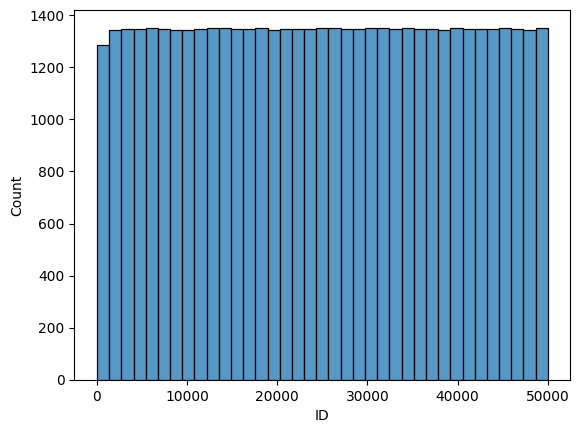

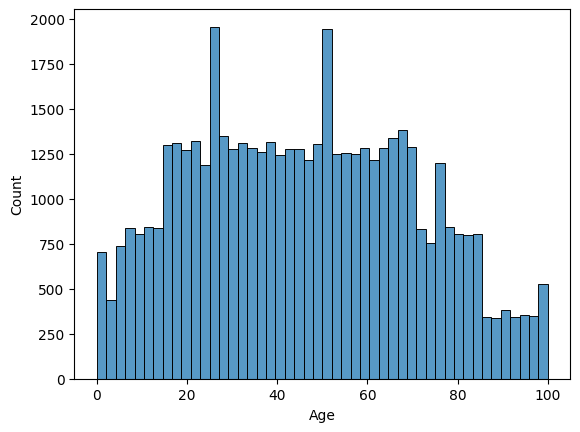

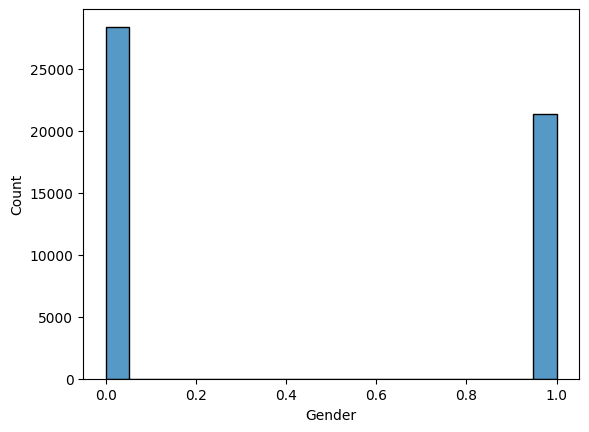

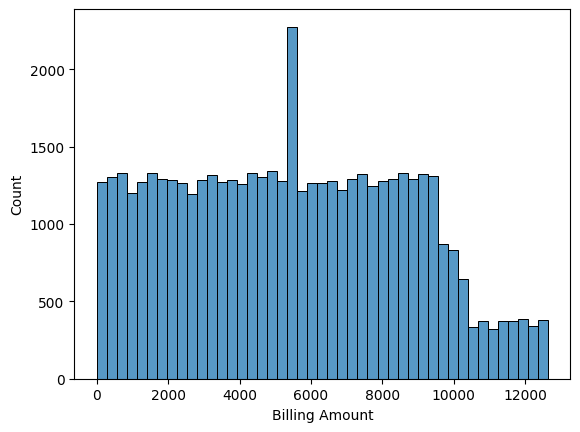

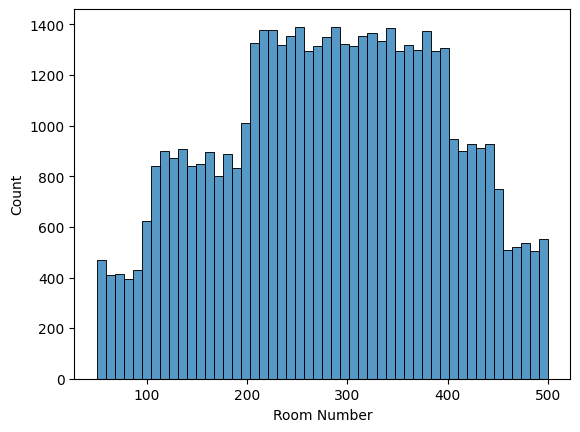

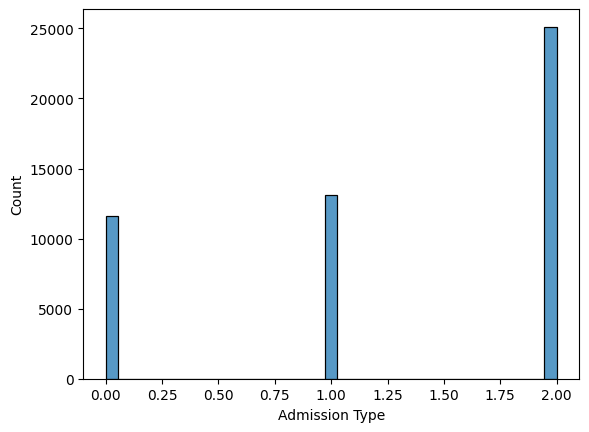

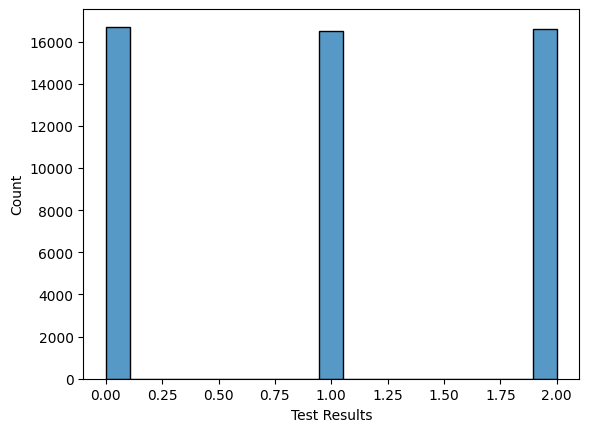

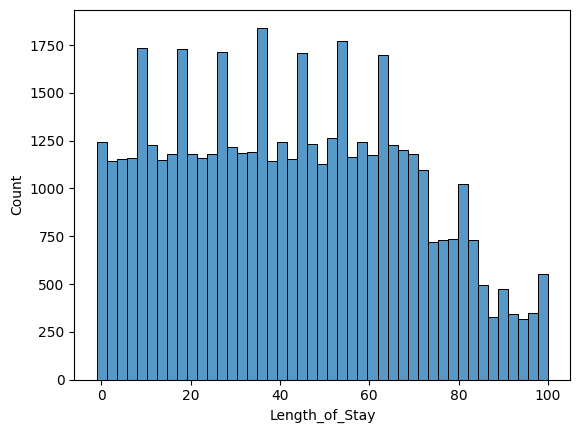

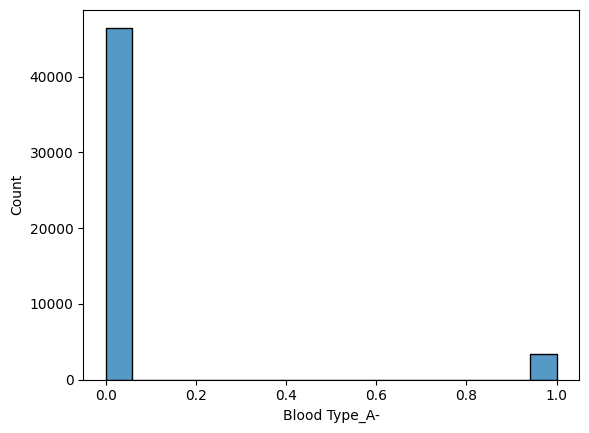

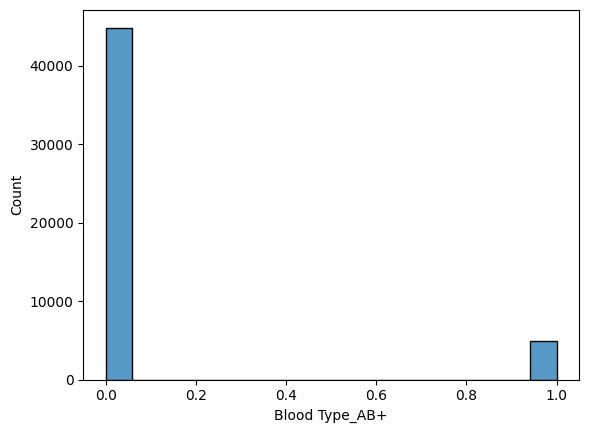

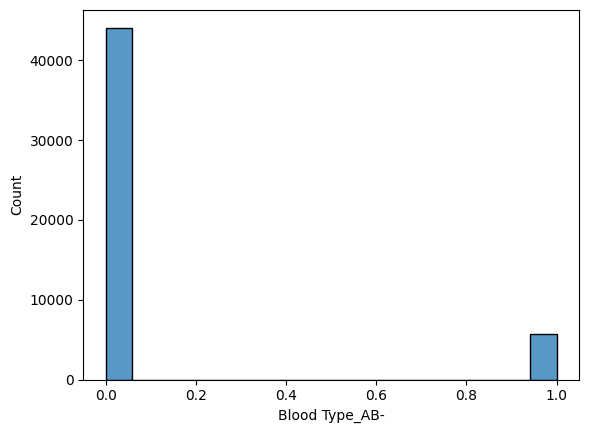

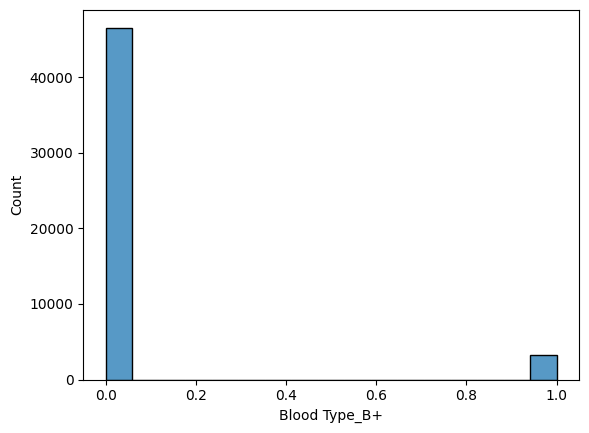

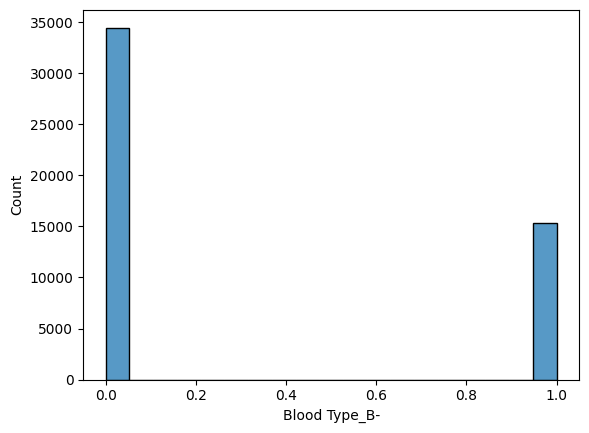

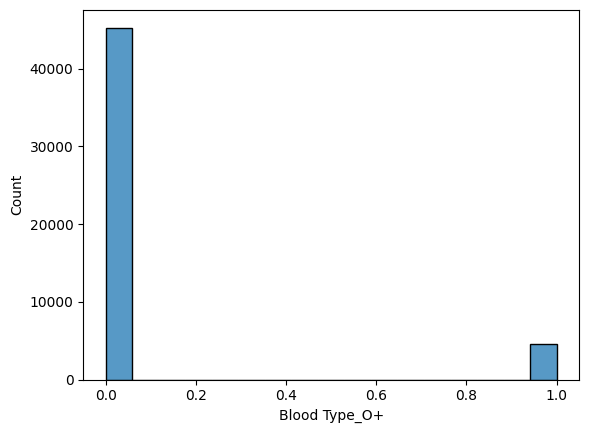

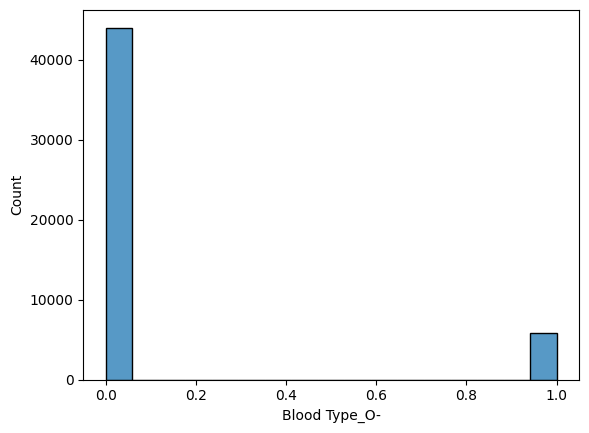

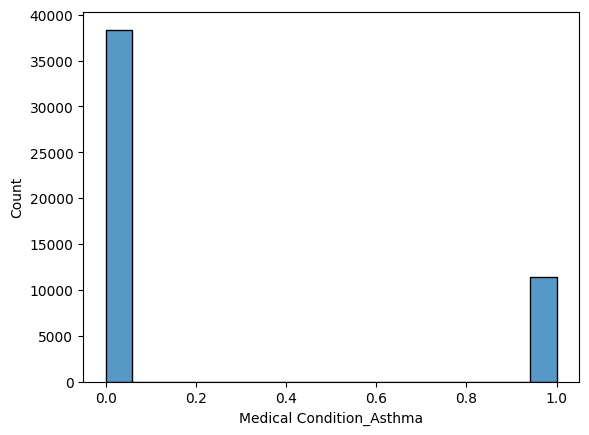

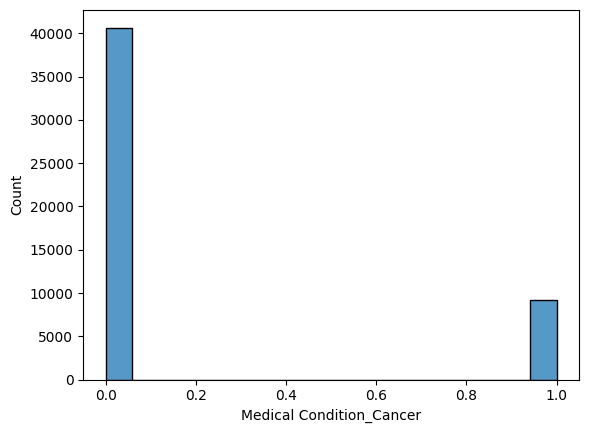

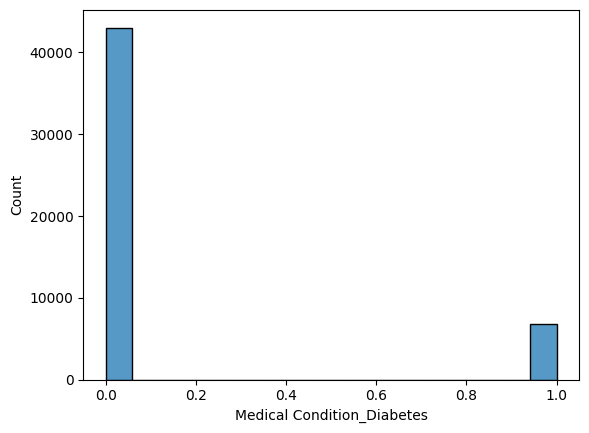

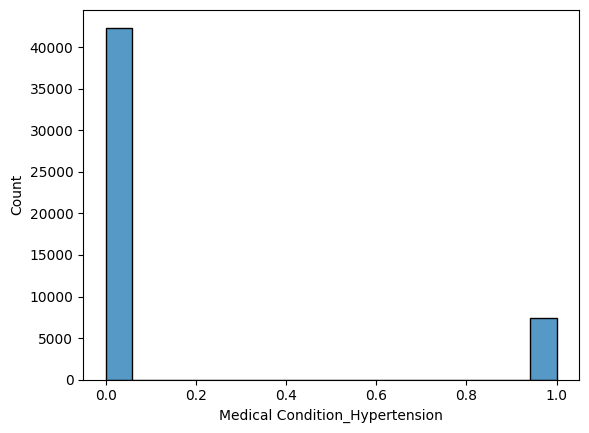

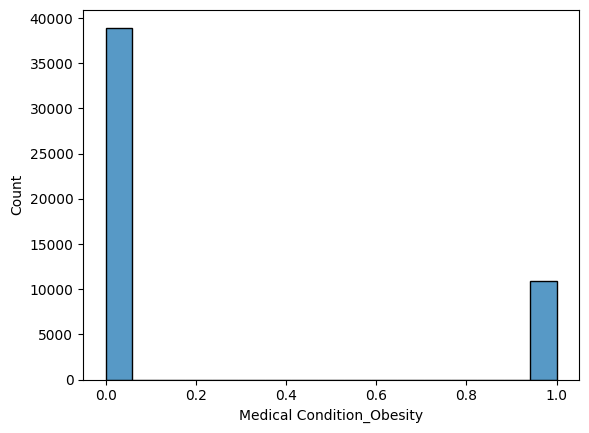

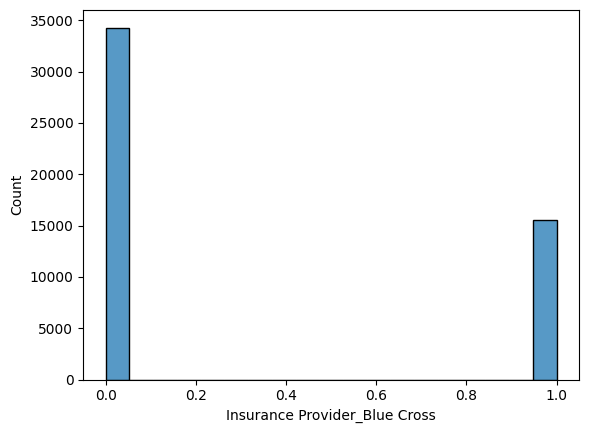

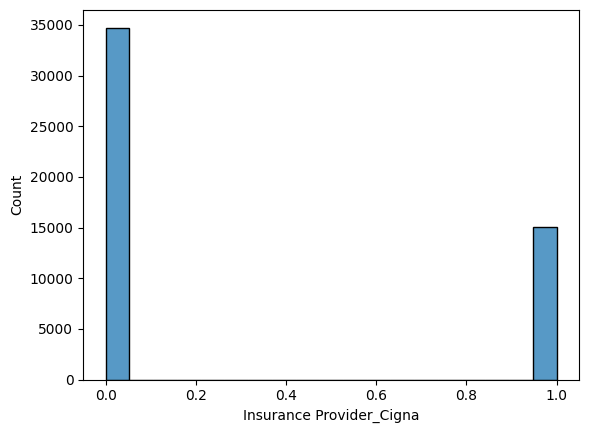

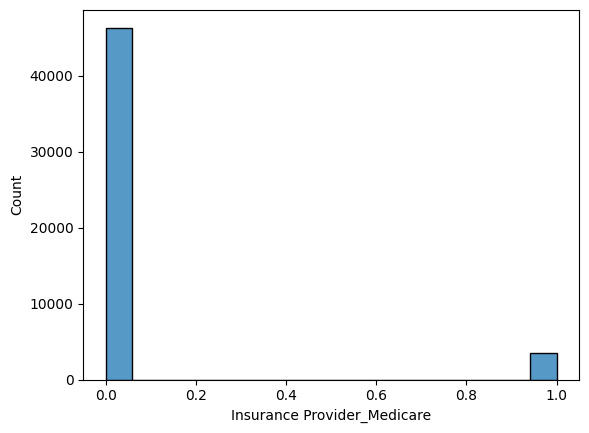

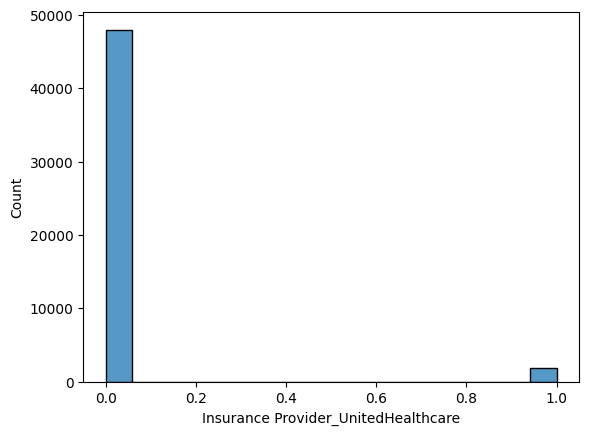

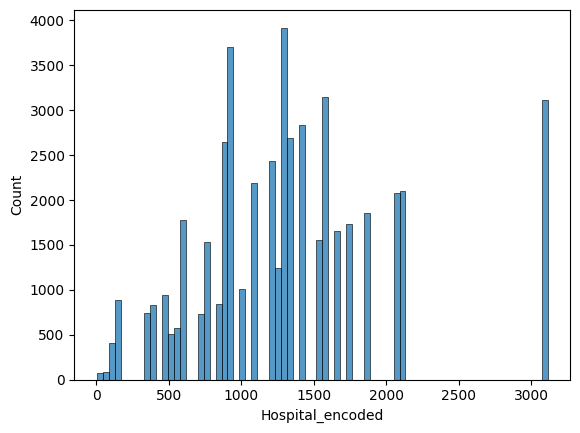

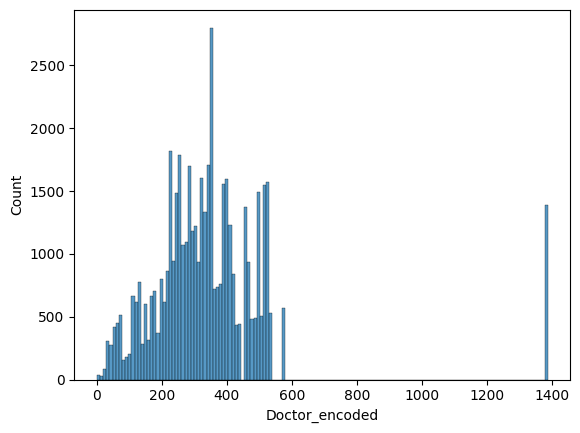

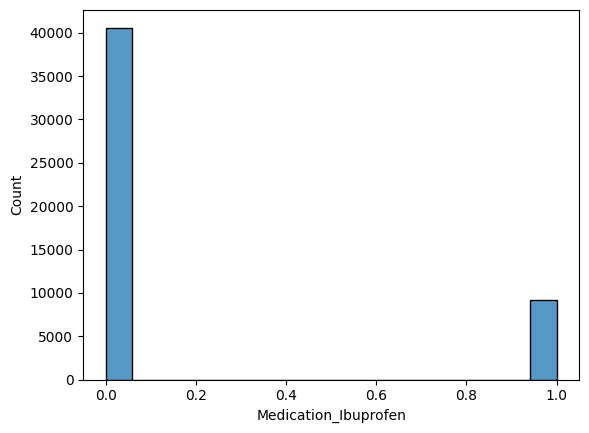

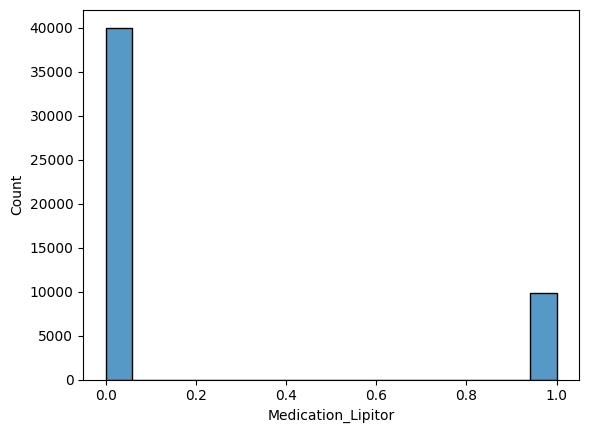

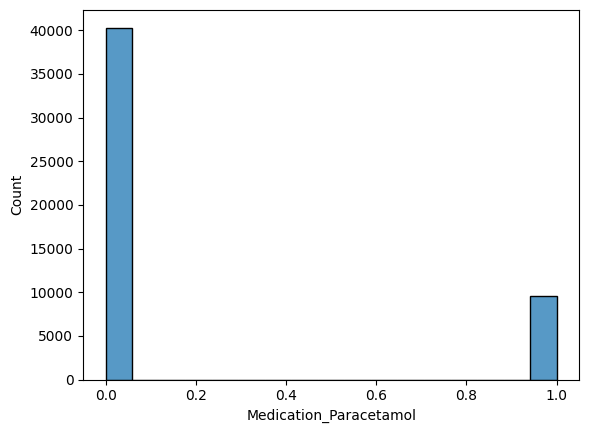

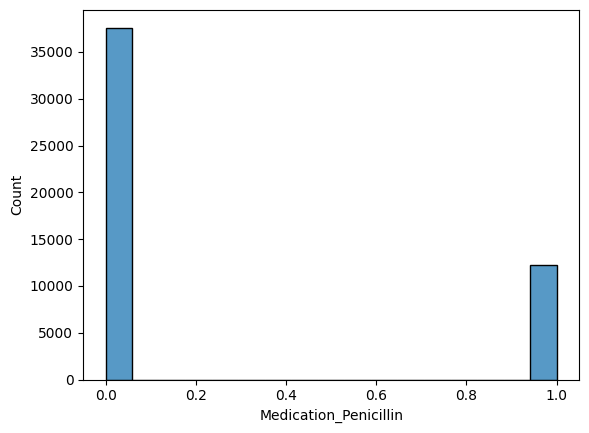

In [31]:
for i in df.select_dtypes(include= "number").columns:
  sns.histplot(data=df,x=i)
  plt.show()

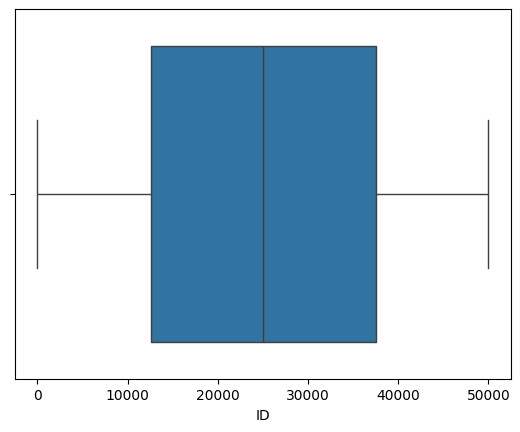

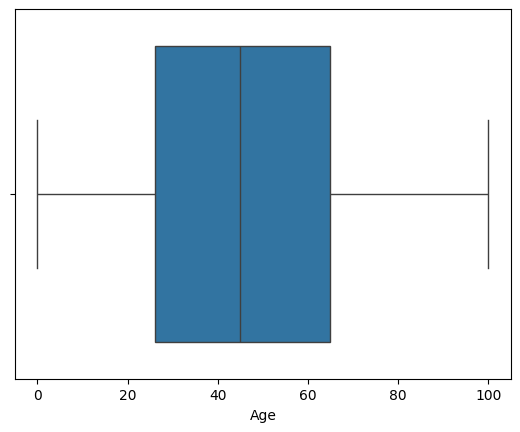

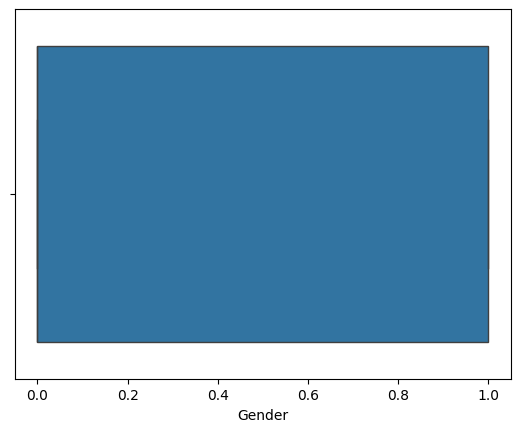

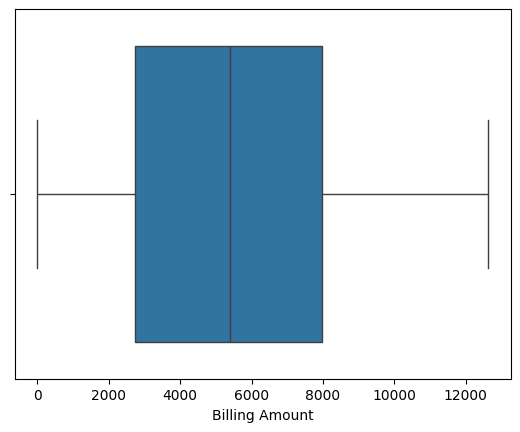

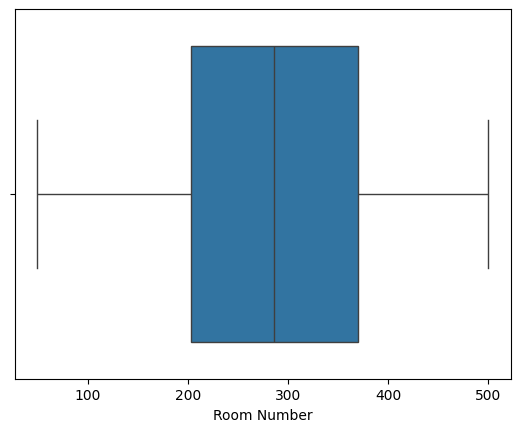

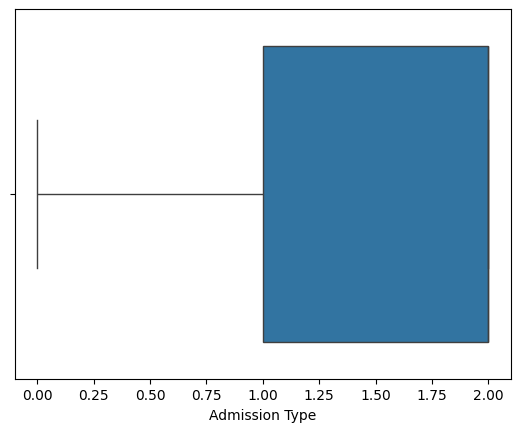

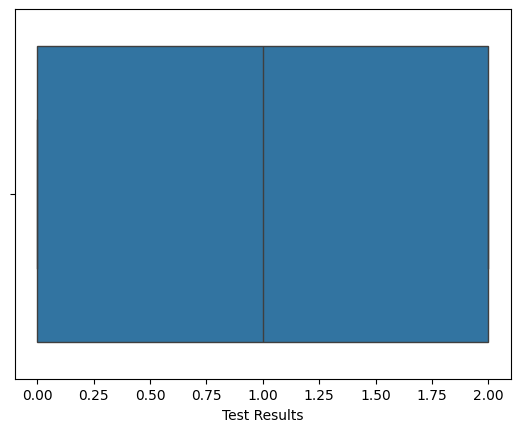

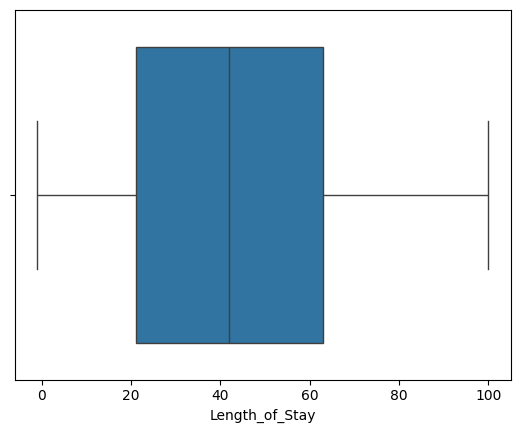

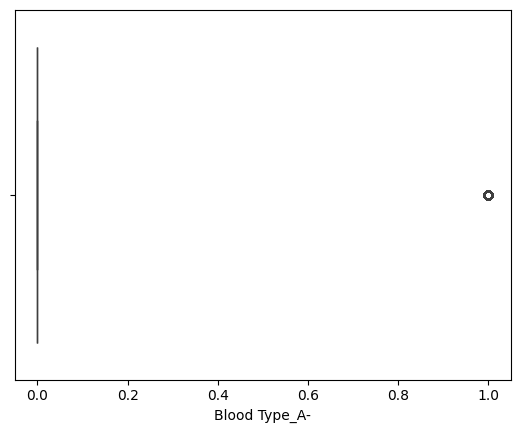

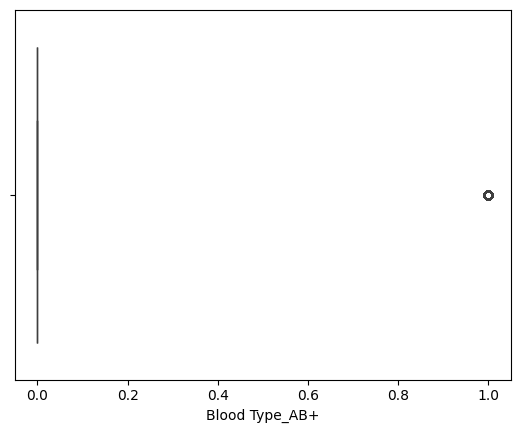

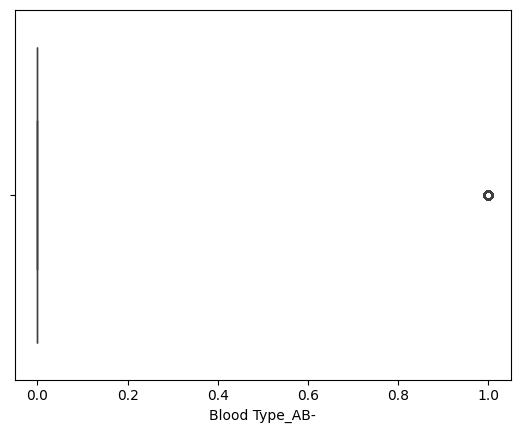

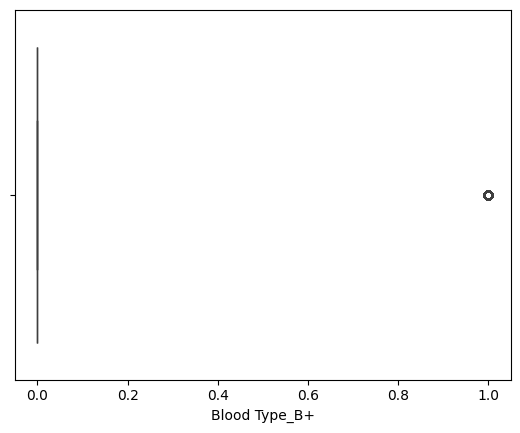

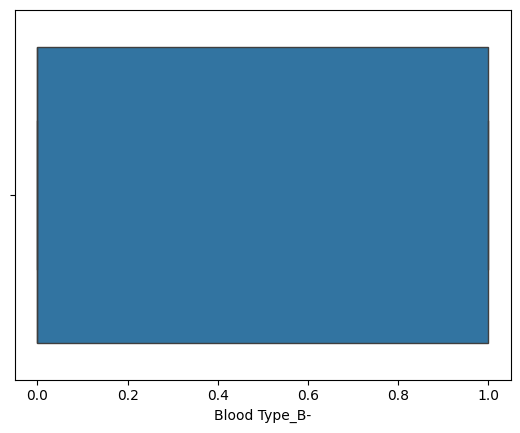

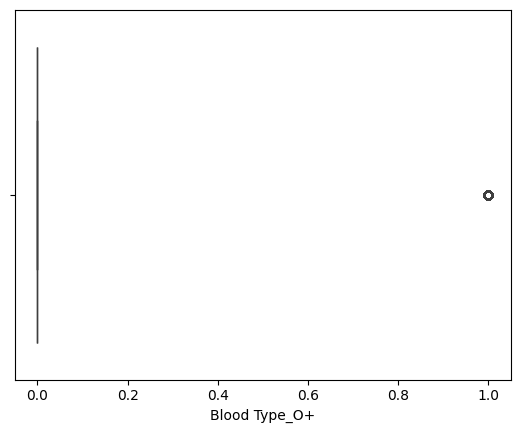

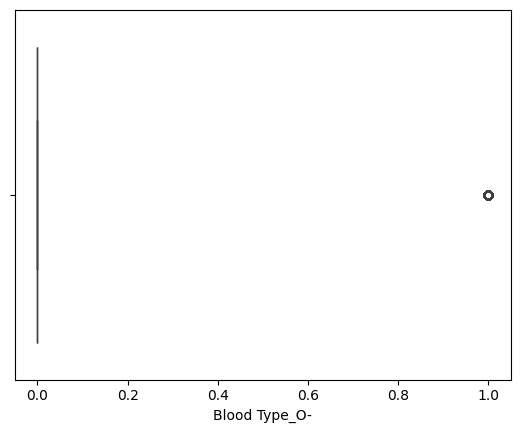

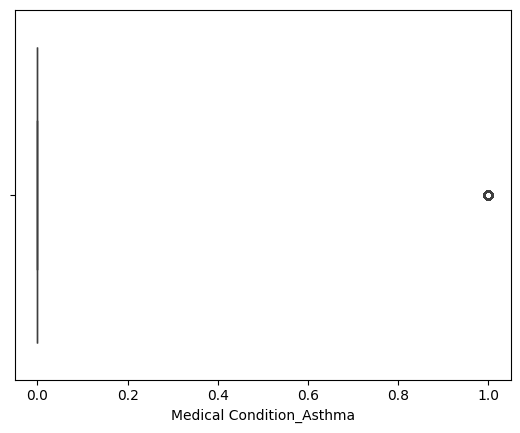

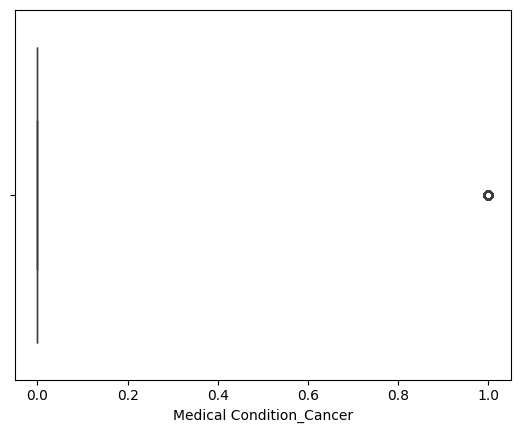

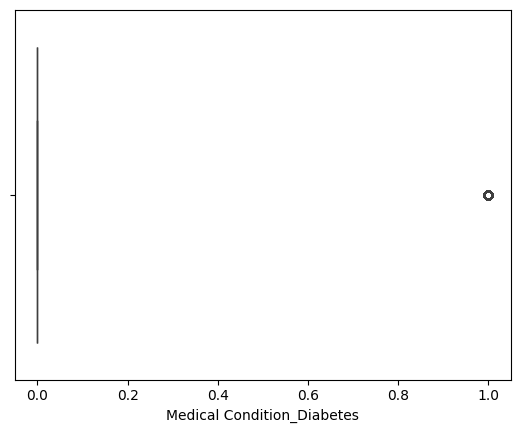

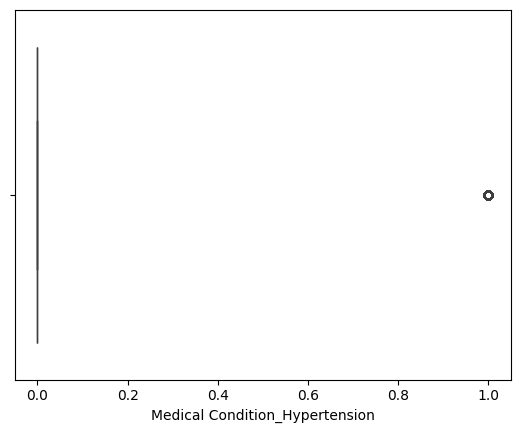

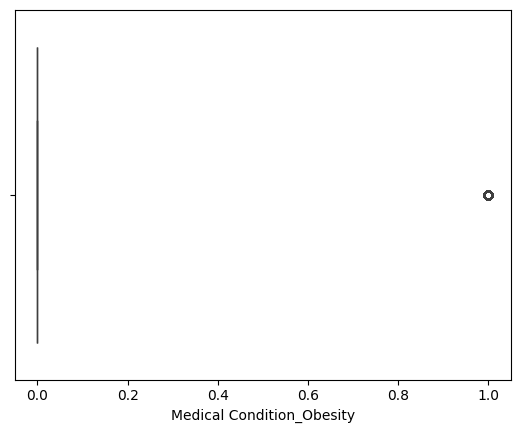

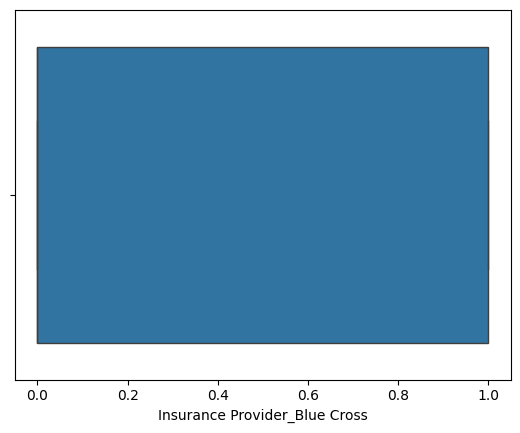

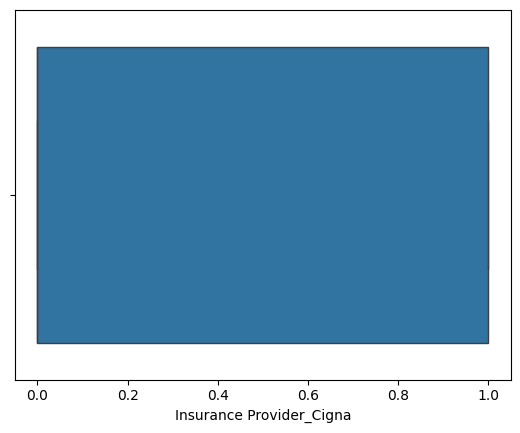

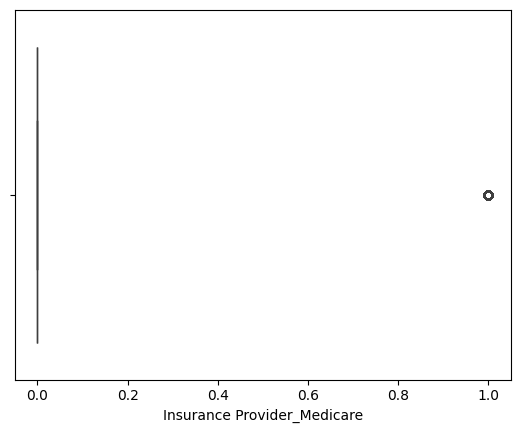

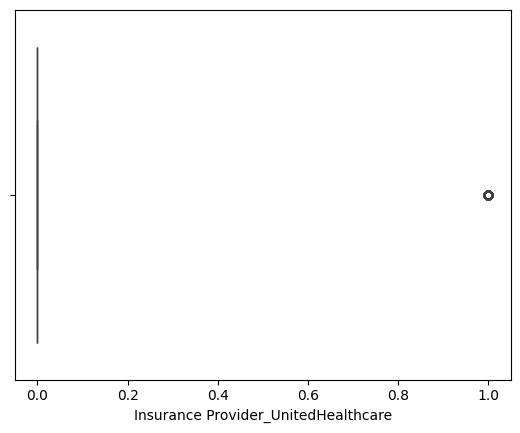

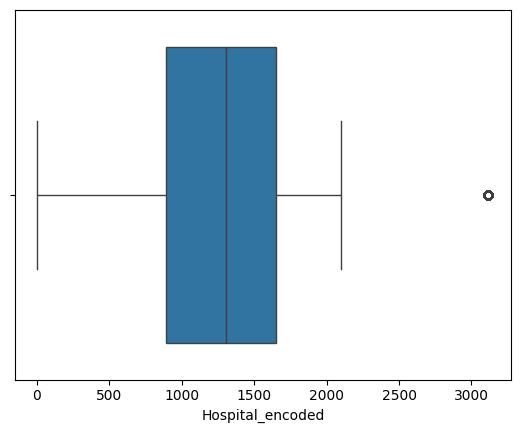

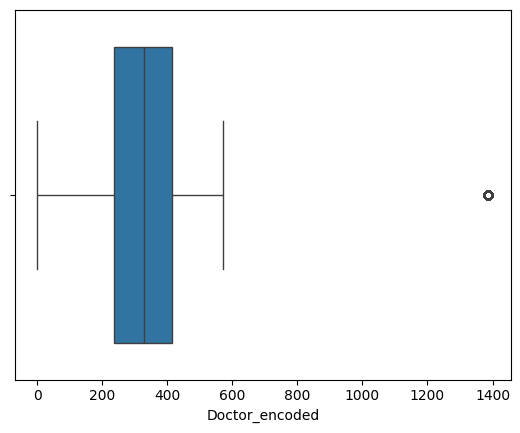

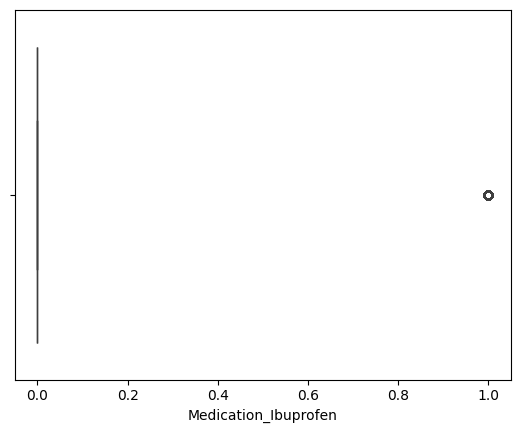

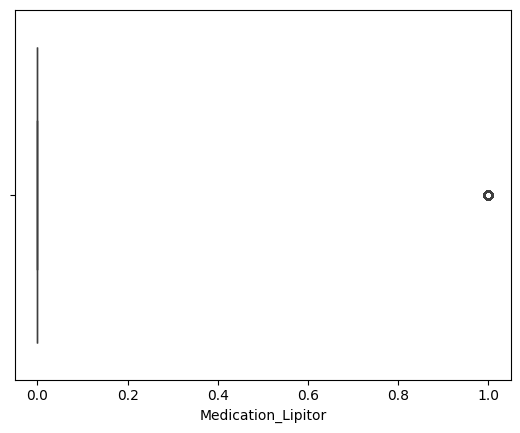

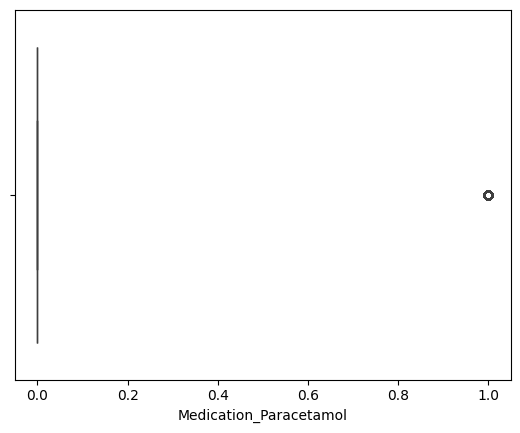

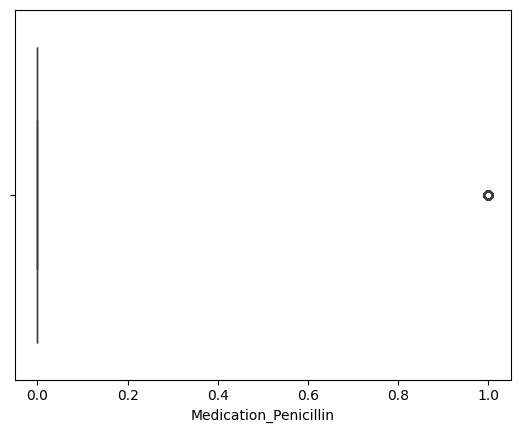

In [32]:
for i in df.select_dtypes(include= "number").columns:
  sns.boxplot(data=df,x=i)
  plt.show()

In [33]:
lower = df['Doctor_encoded'].quantile(0.05)
upper = df['Doctor_encoded'].quantile(0.95)
df['Doctor_encoded'] = df['Doctor_encoded'].clip(lower, upper)

In [34]:
df['Hospital_encoded'] = np.log1p(df['Hospital_encoded'])

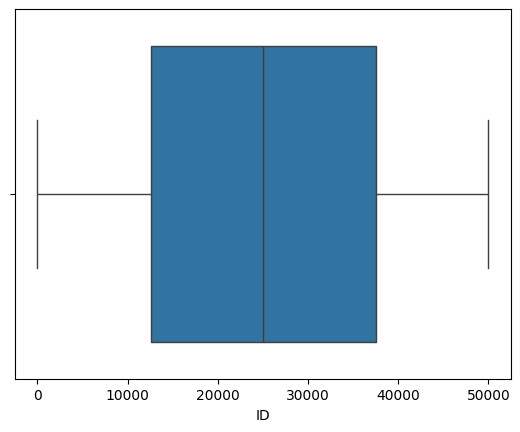

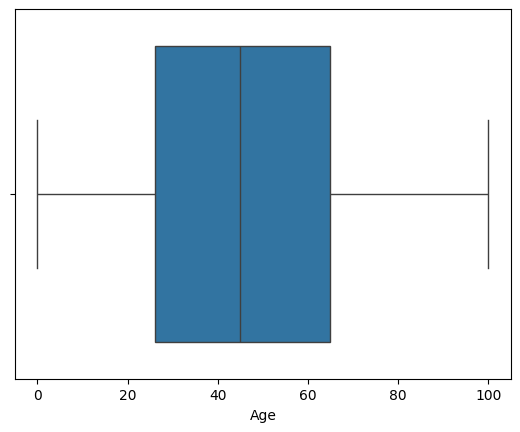

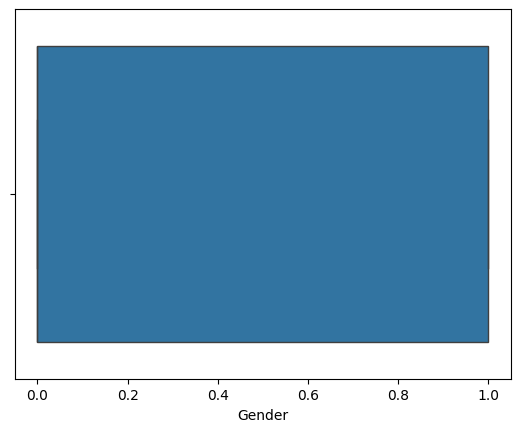

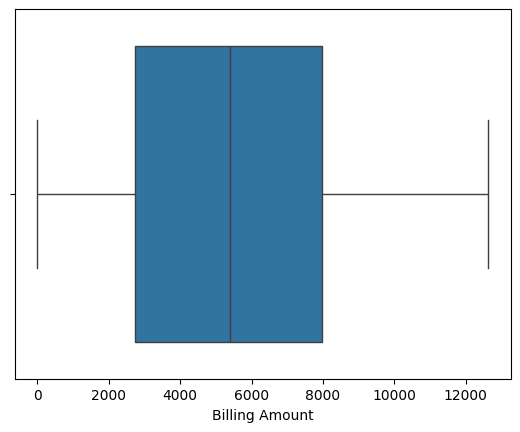

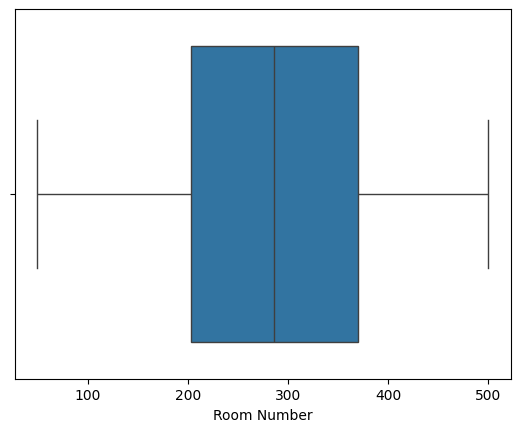

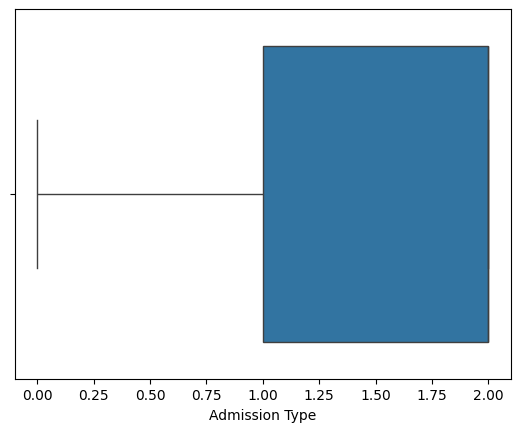

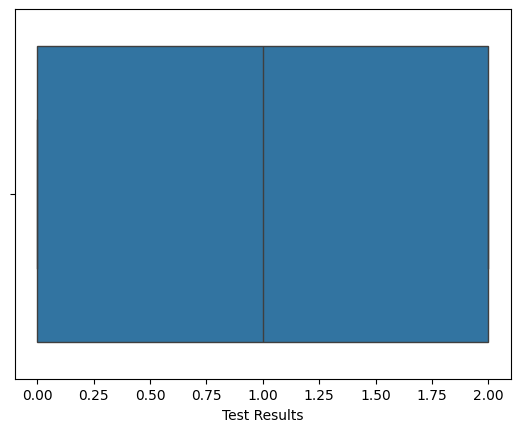

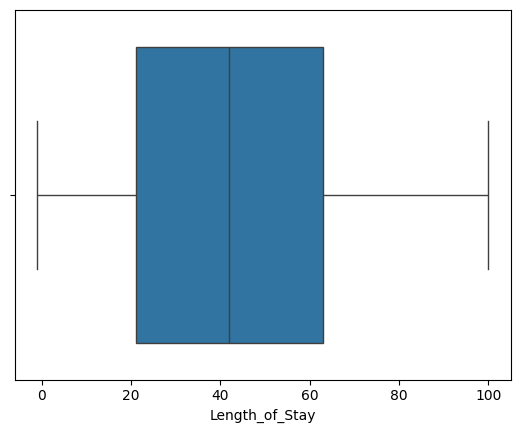

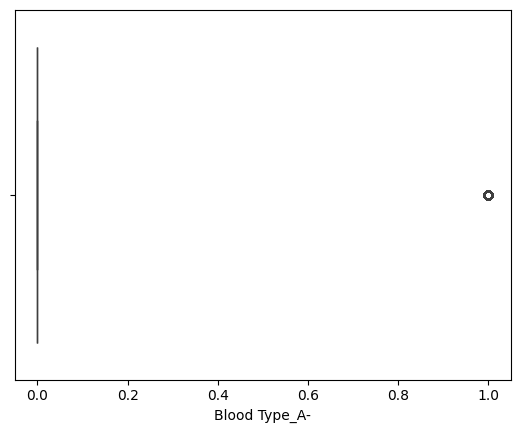

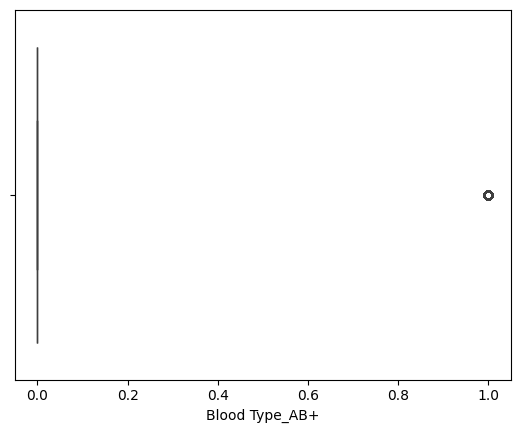

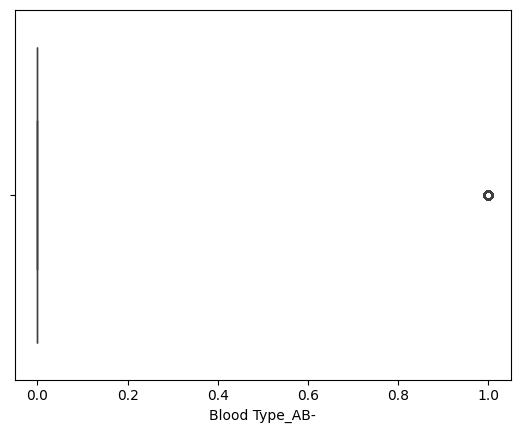

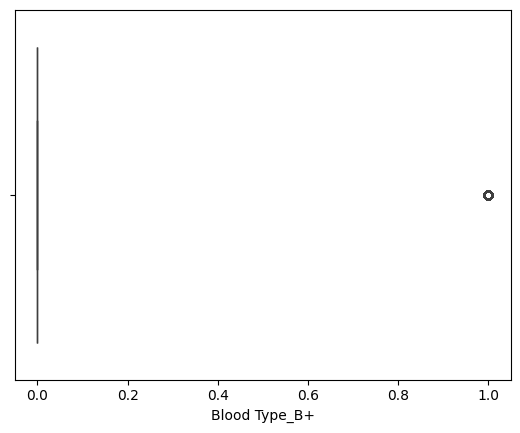

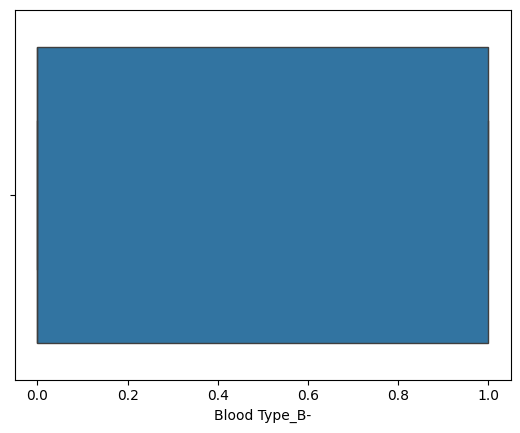

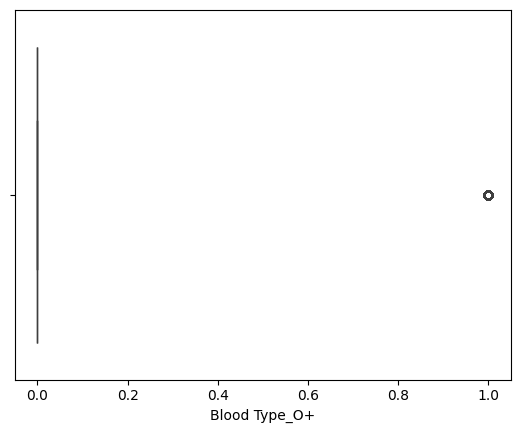

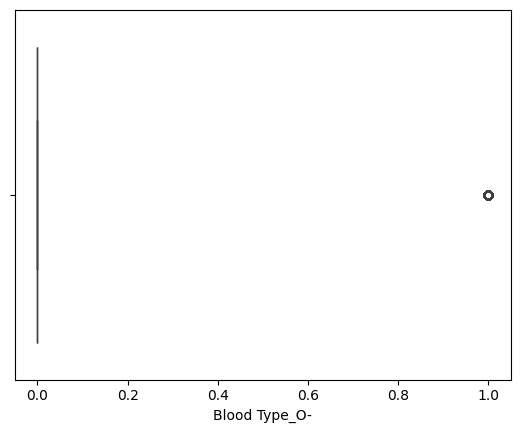

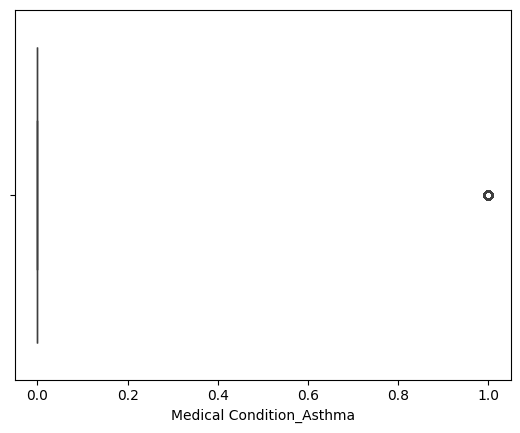

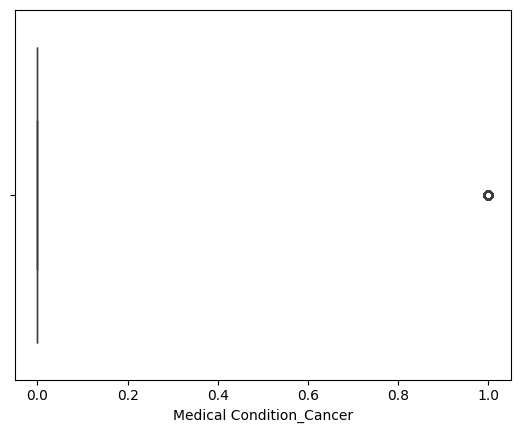

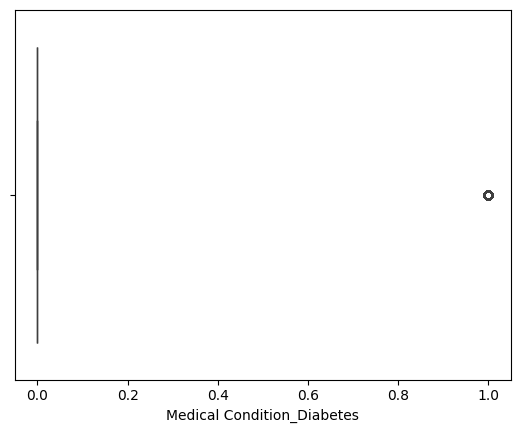

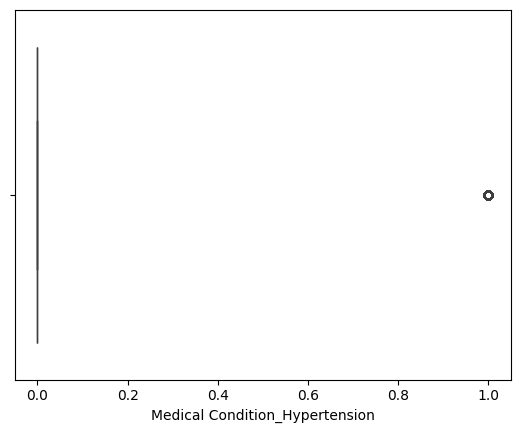

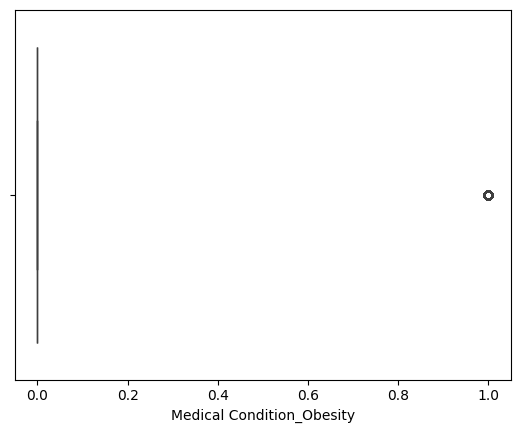

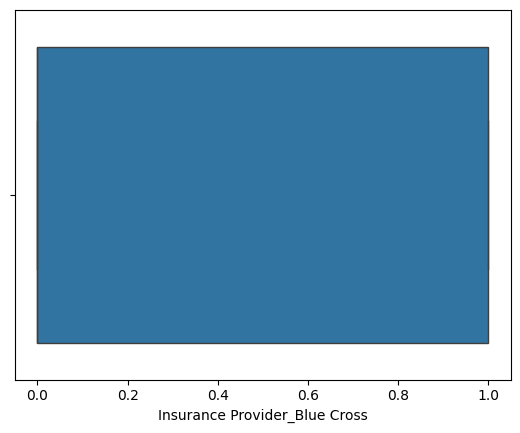

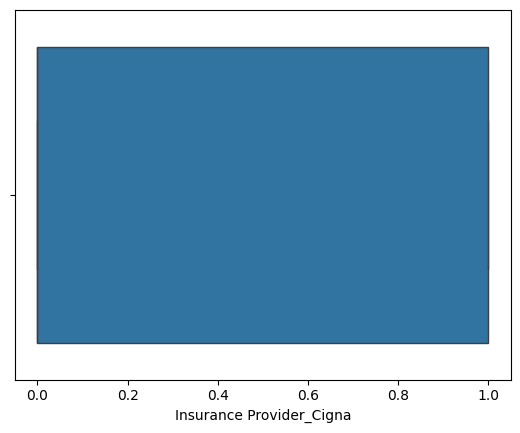

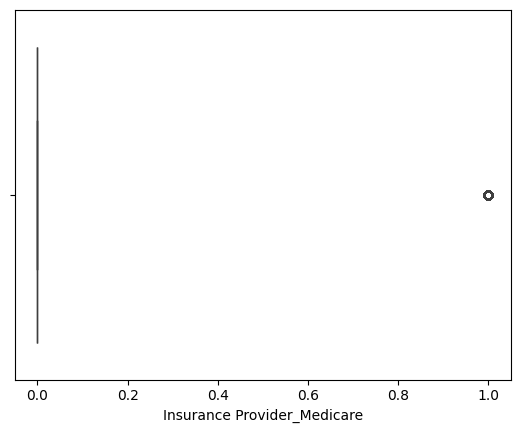

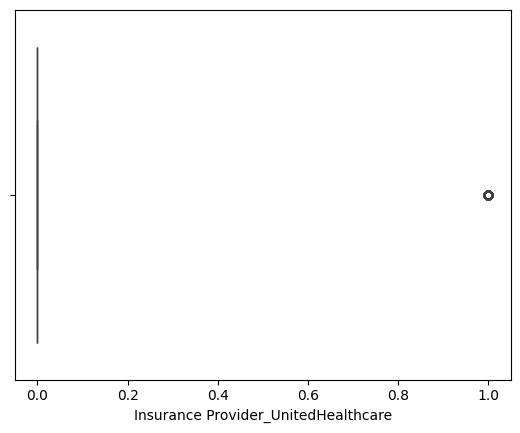

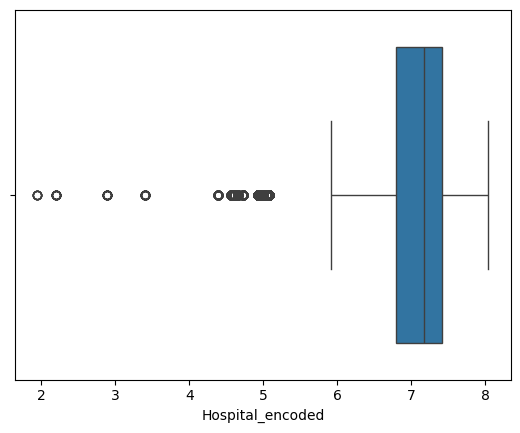

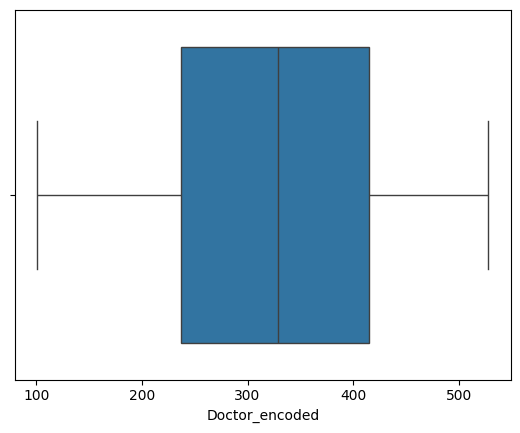

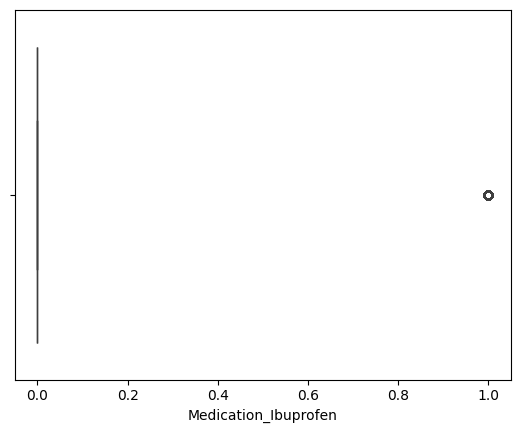

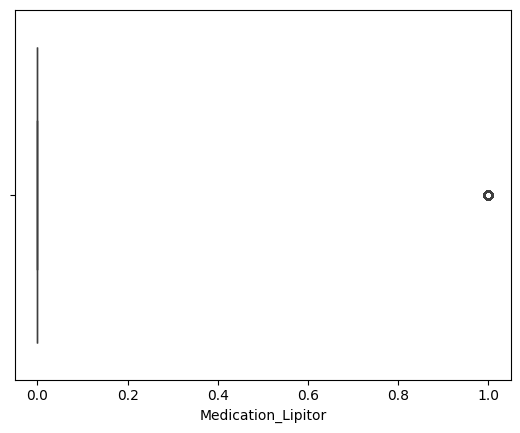

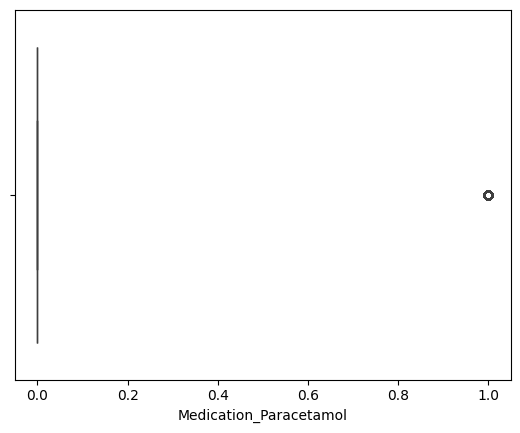

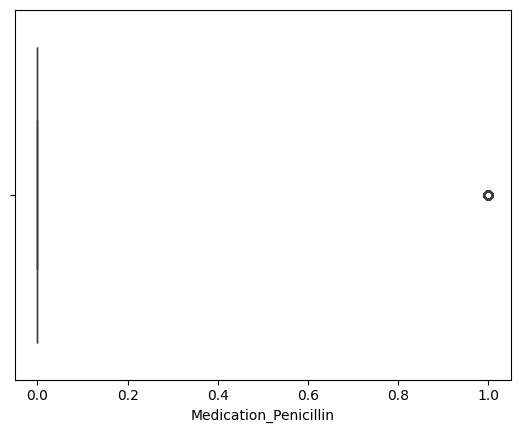

In [35]:
for i in df.select_dtypes(include= "number").columns:
  sns.boxplot(data=df,x=i)
  plt.show()

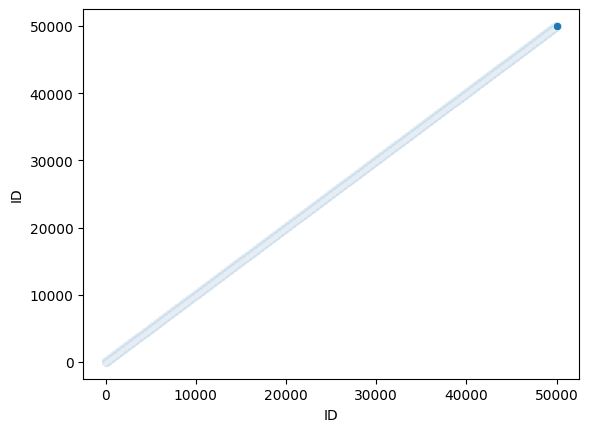

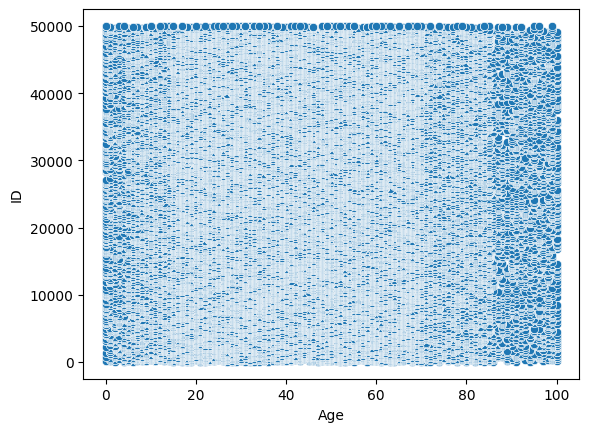

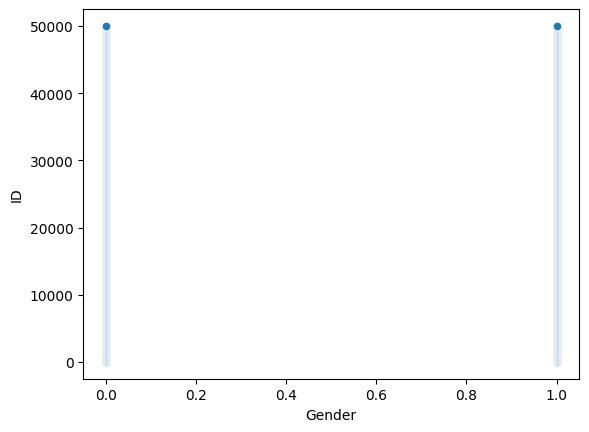

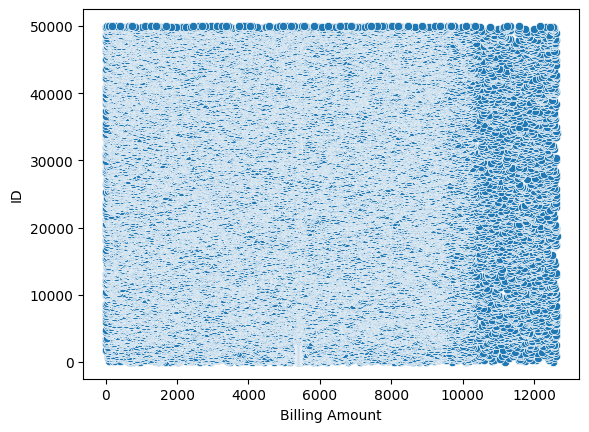

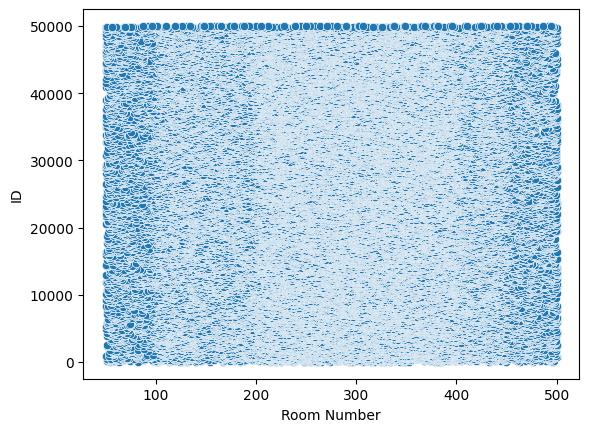

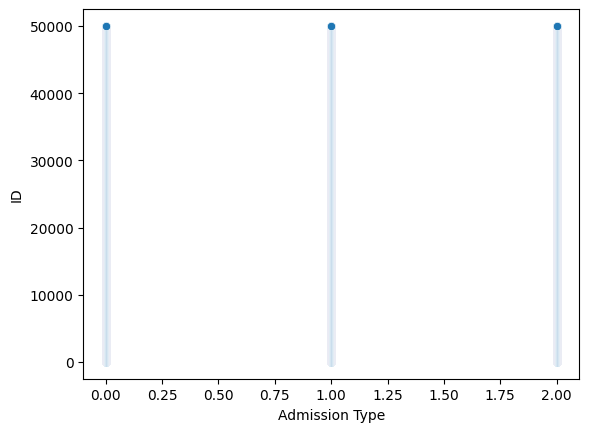

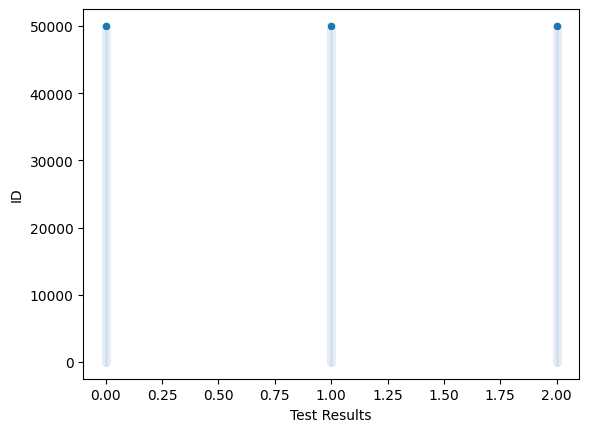

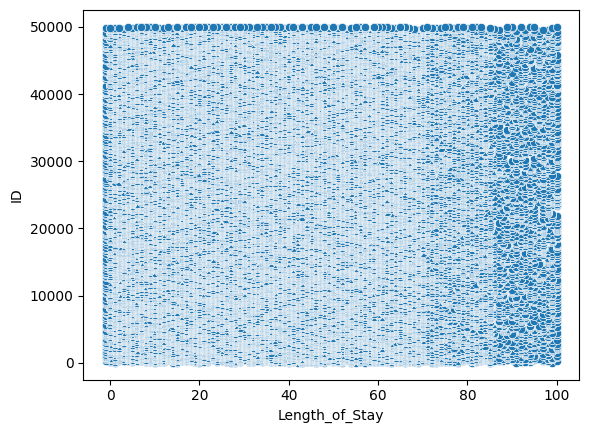

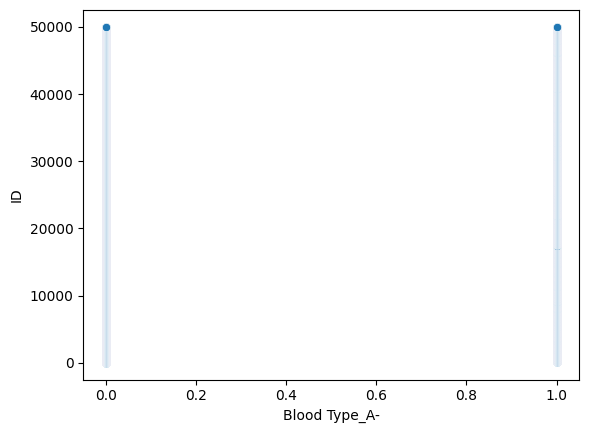

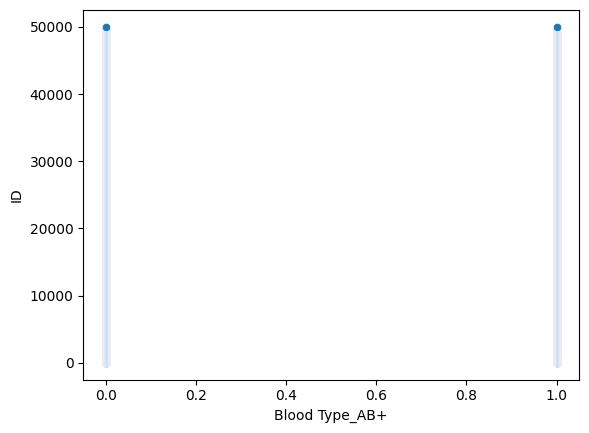

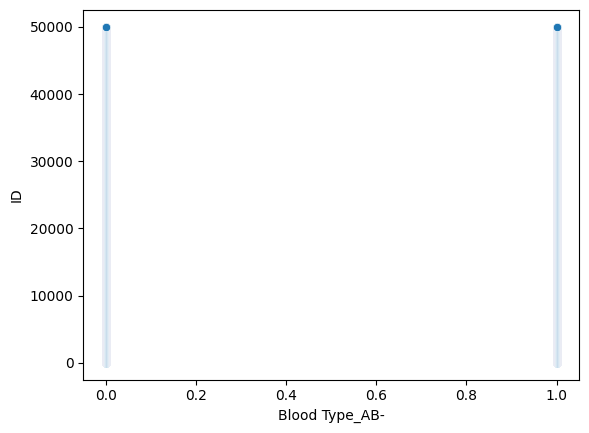

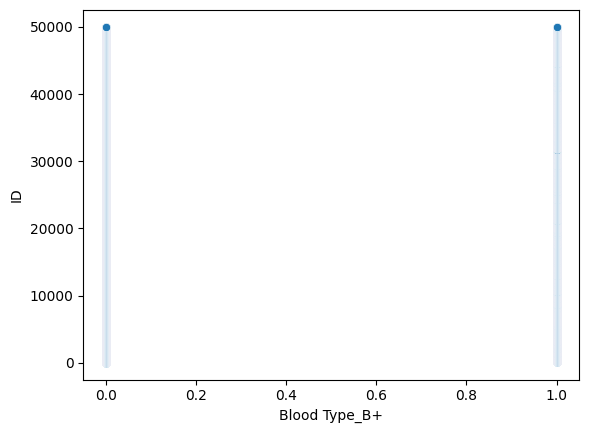

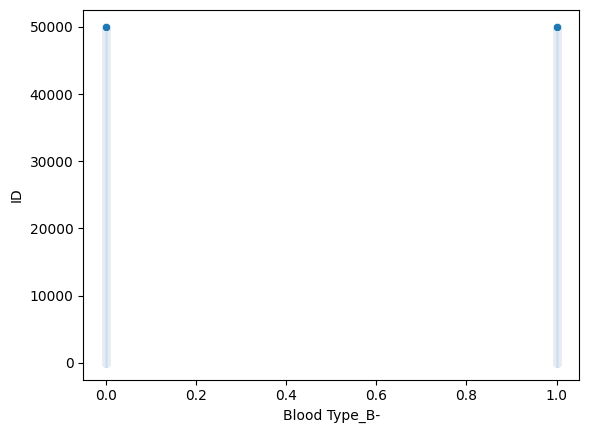

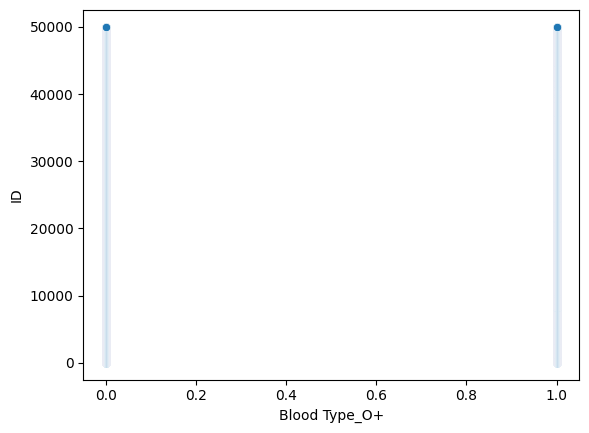

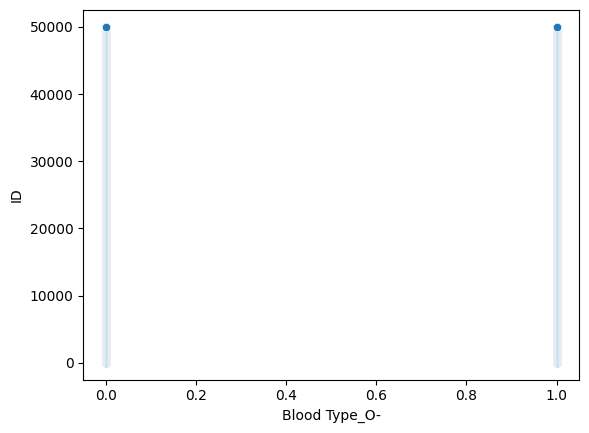

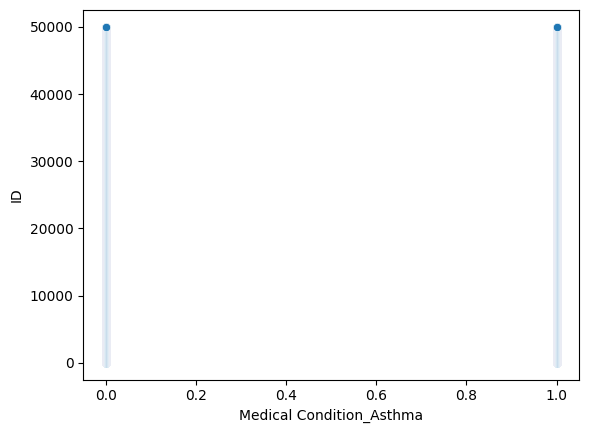

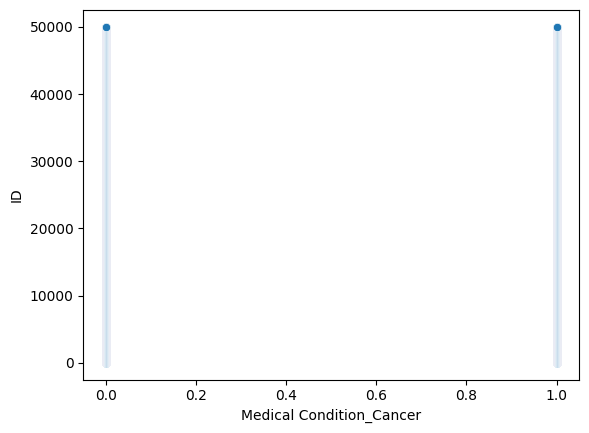

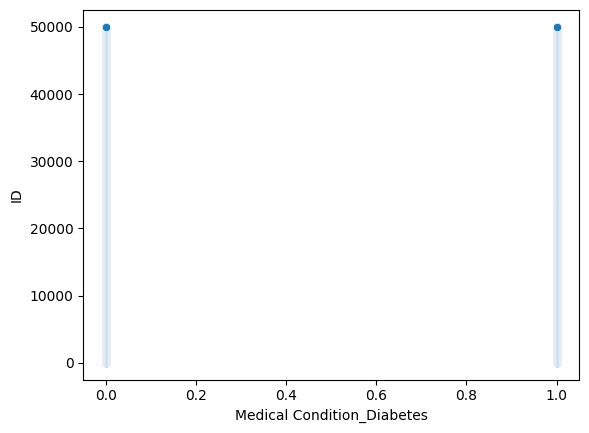

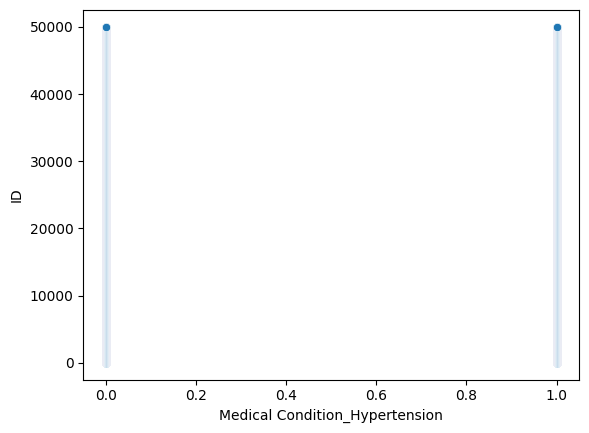

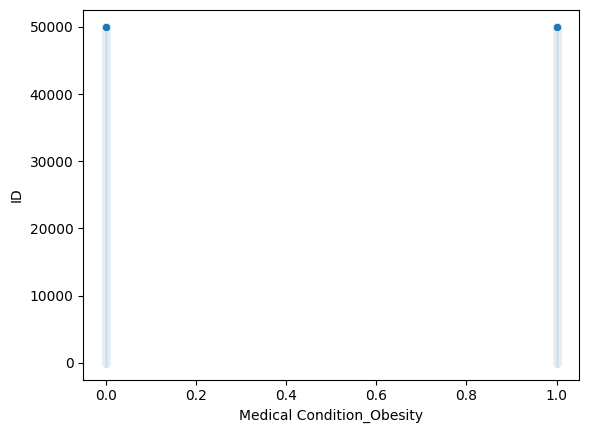

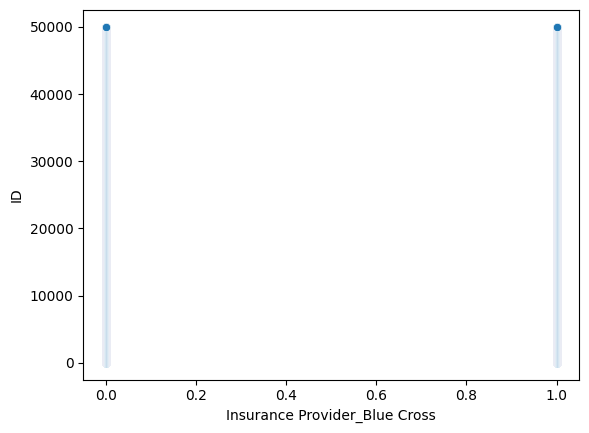

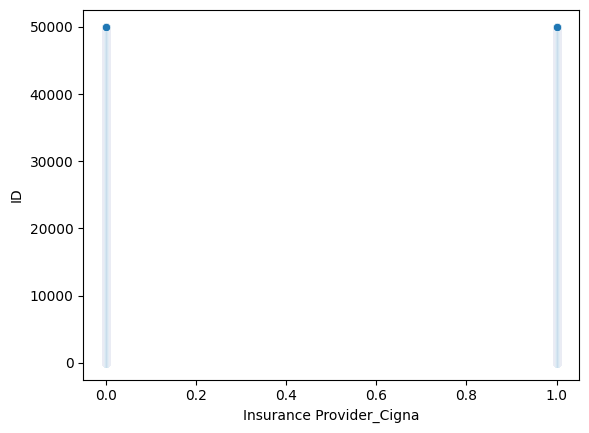

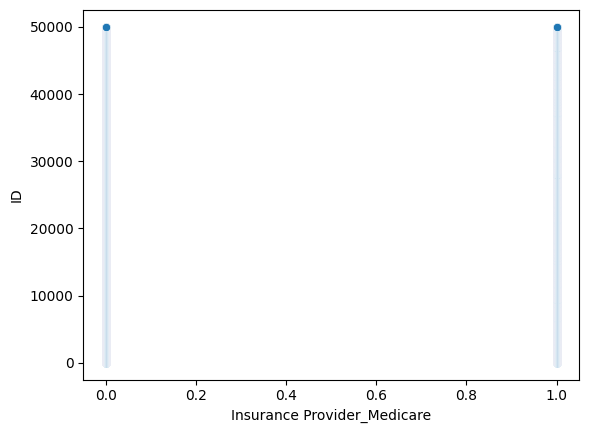

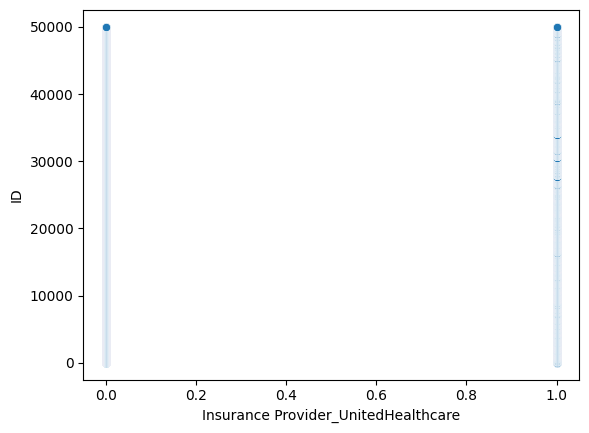

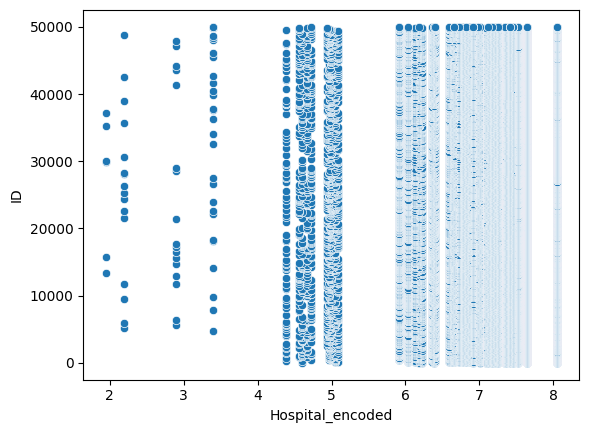

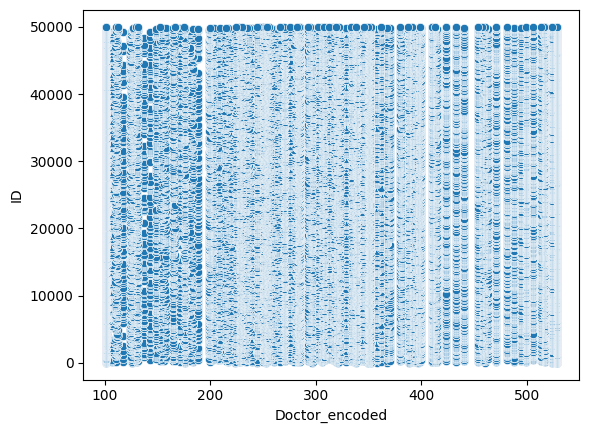

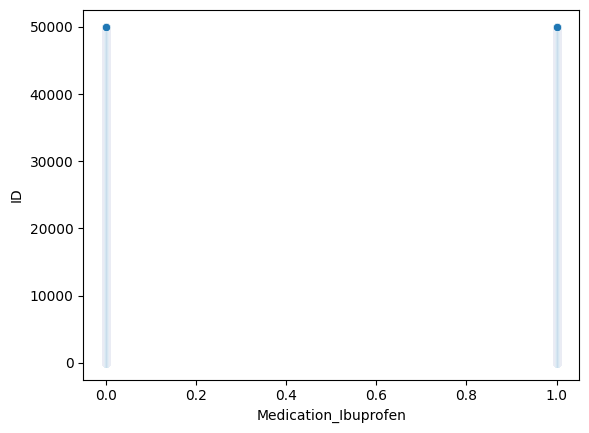

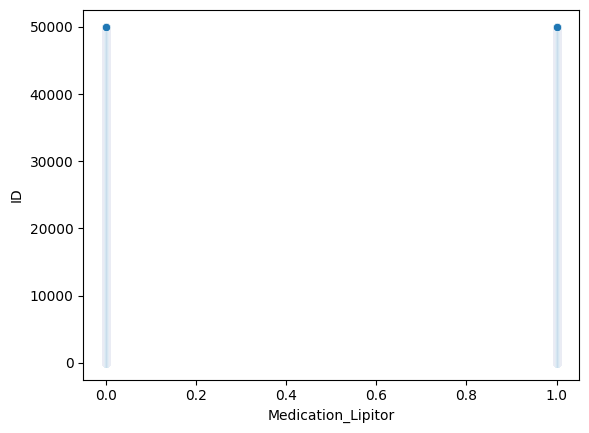

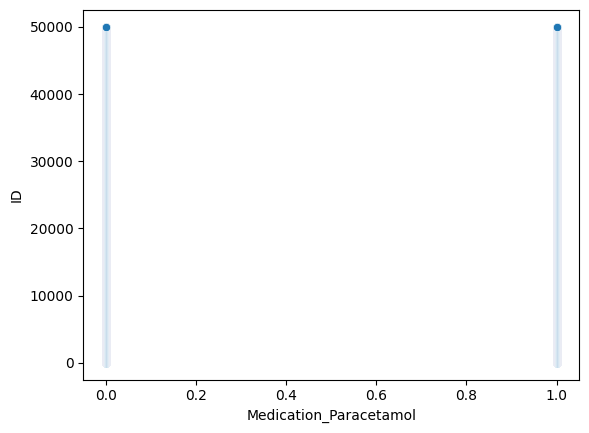

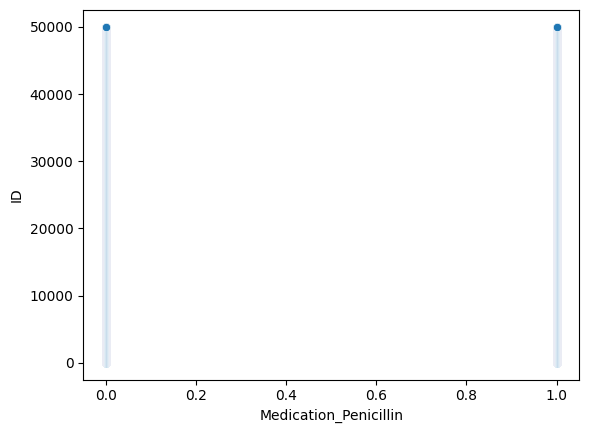

In [36]:
numeric_columns = df.select_dtypes(include = "number")
for i in numeric_columns:
  sns.scatterplot(data=df, x =i,y = 'ID' )
  plt.show()

<Axes: >

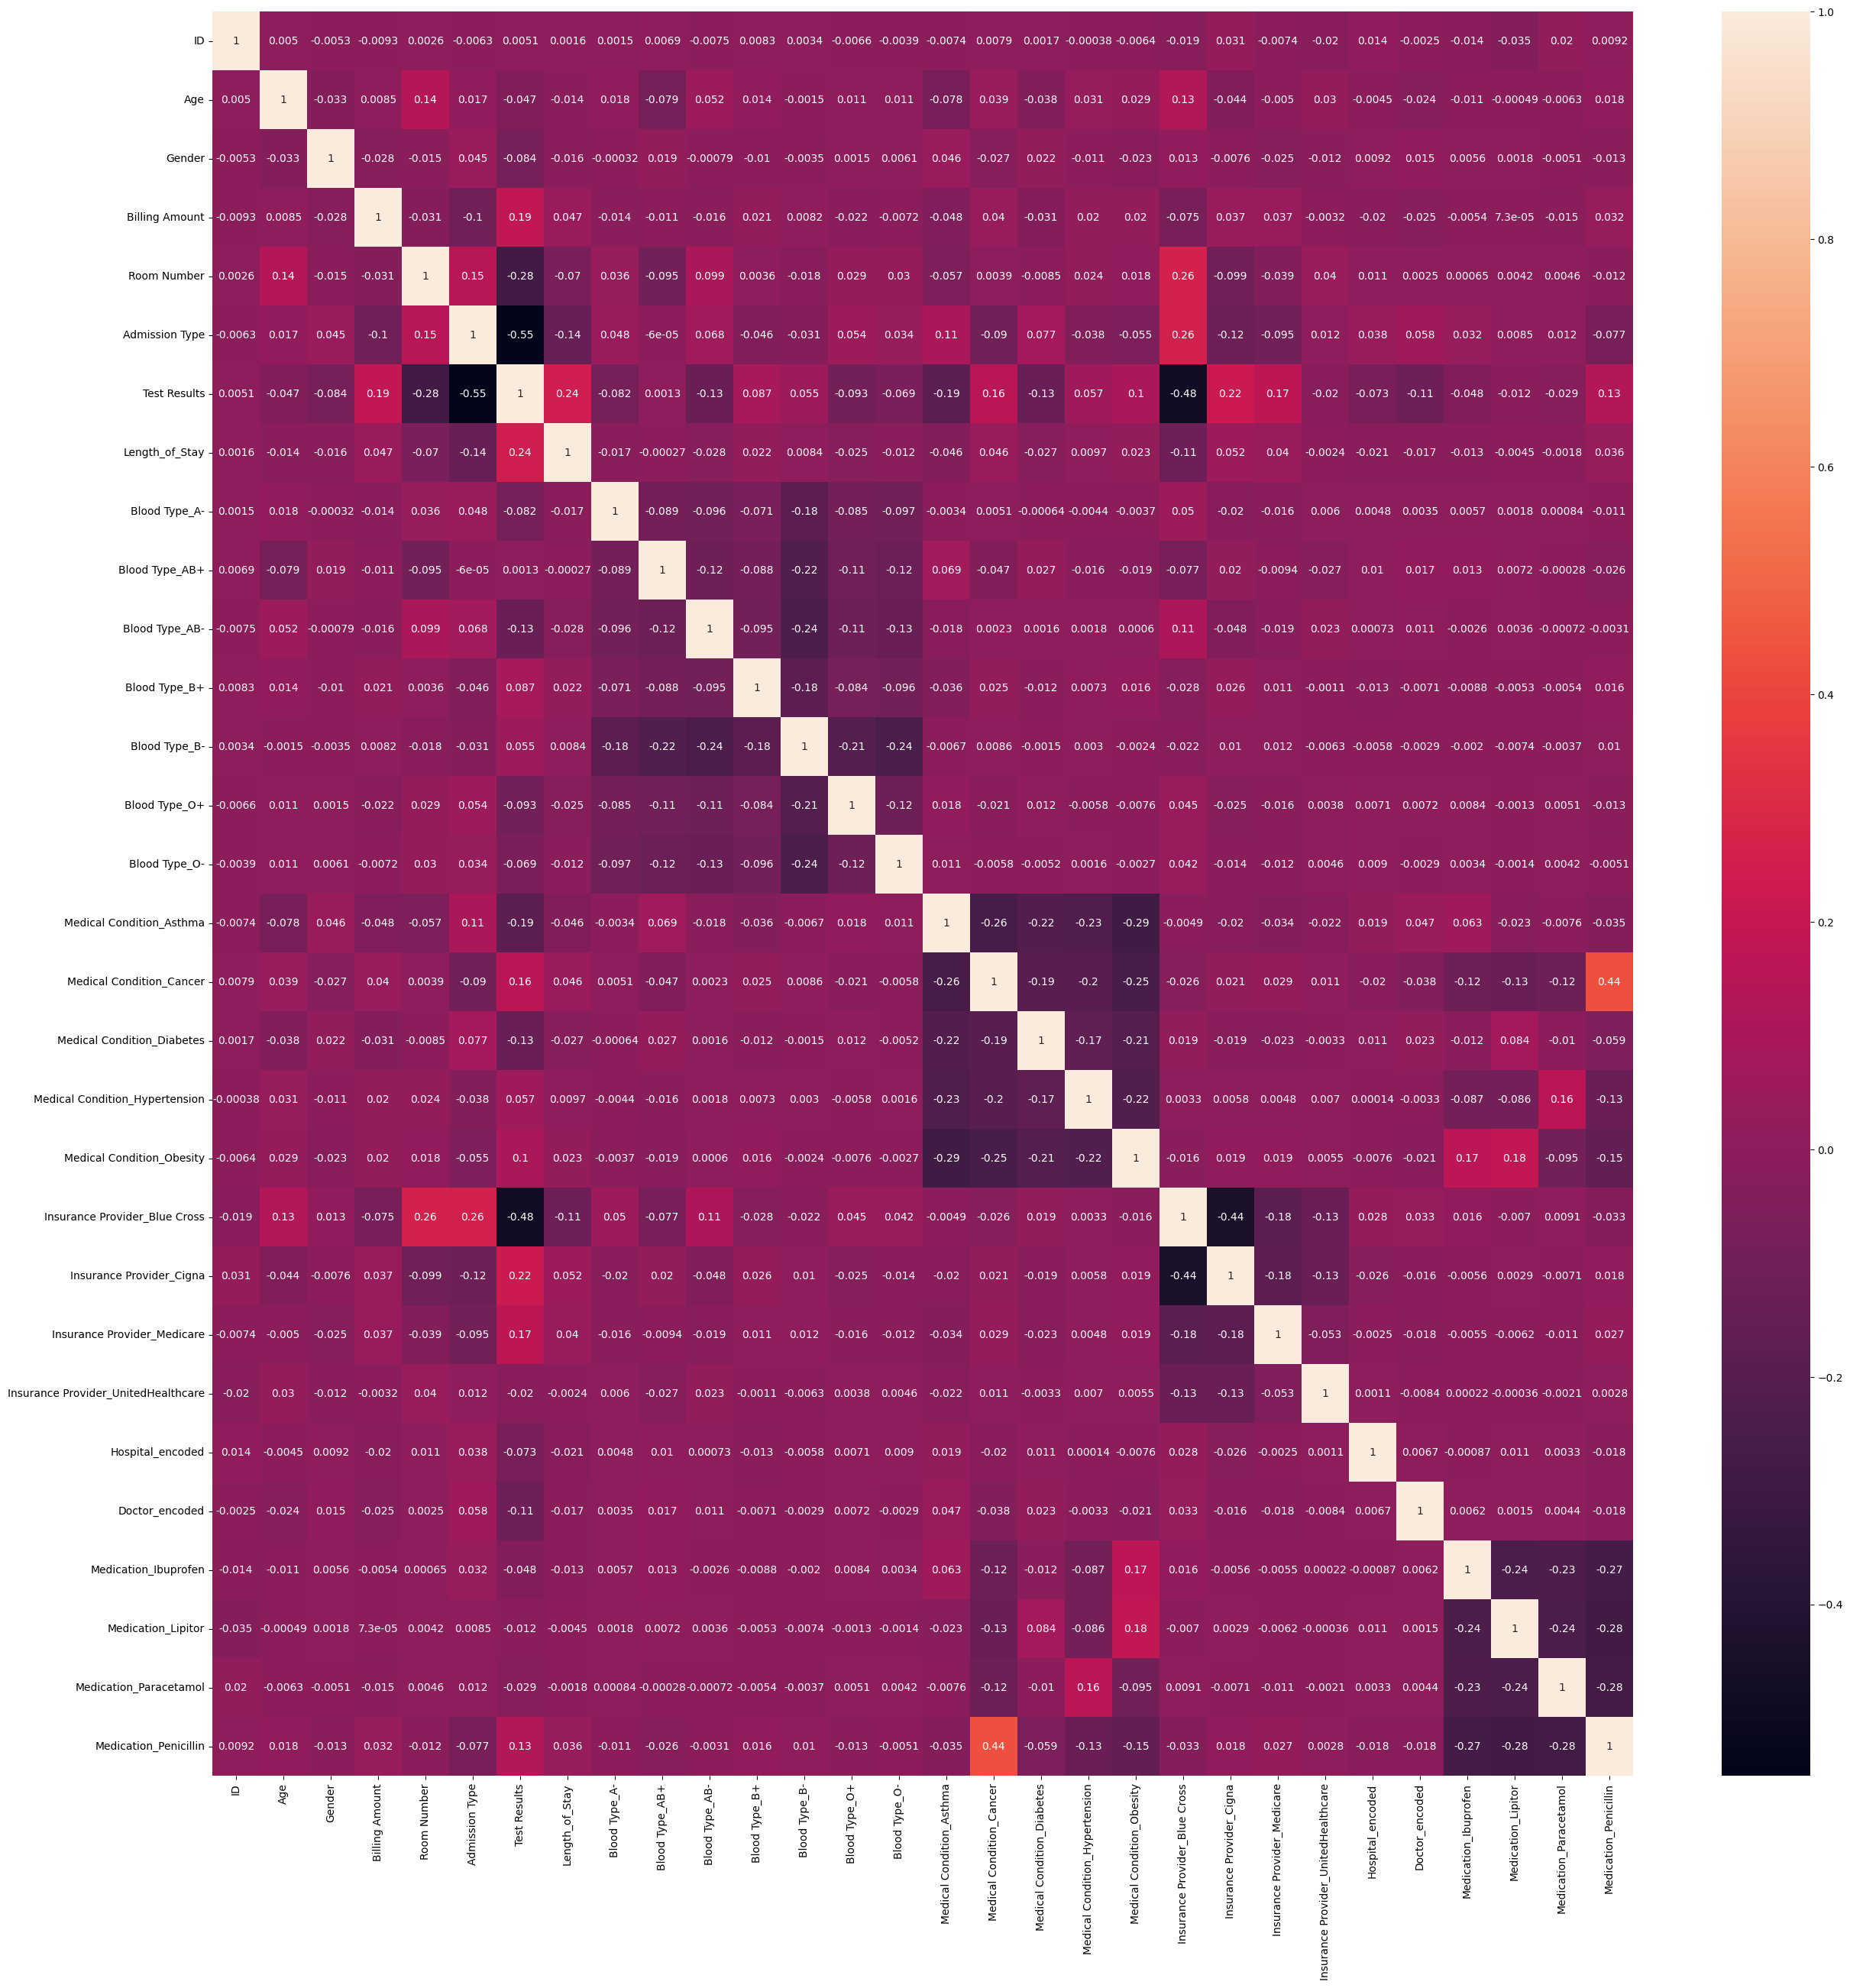

In [37]:
s = df.select_dtypes(include ="number").corr()
plt.figure(figsize=(30,30))
sns.heatmap(s,annot = True)

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X = df.drop('Test Results', axis=1)
y = df['Test Results']
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [39]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_val_pca = pca.transform(X_val_scaled)
X_test_pca = pca.transform(X_test_scaled)
print(f"Number of components selected: {pca.n_components_}")

Number of components selected: 25


In [40]:
svm = SVC(kernel='rbf', C=1.0, gamma='scale')
svm.fit(X_train_pca, y_train)
val_preds = svm.predict(X_val_pca)
val_acc = accuracy_score(y_val, val_preds)
print(f"Validation Accuracy: {val_acc:.4f}")
test_preds = svm.predict(X_test_pca)
print("Test Accuracy:", accuracy_score(y_test, test_preds))

Validation Accuracy: 0.8528
Test Accuracy: 0.849959855479727


In [41]:
nb = GaussianNB()
nb.fit(X_train_pca, y_train)

val_preds = nb.predict(X_val_pca)
val_acc = accuracy_score(y_val, val_preds)
print(f"Validation Accuracy: {val_acc:.4f}")
test_preds = nb.predict(X_test_pca)
print("Test Accuracy:", accuracy_score(y_test, test_preds))

Validation Accuracy: 0.7876
Test Accuracy: 0.7791047771979125


In [42]:
#Ensemble model

In [43]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train_pca, y_train)

val_preds = xgb.predict(X_val_pca)
print("XGBoost - Validation Accuracy:", accuracy_score(y_val, val_preds))

test_preds = xgb.predict(X_test_pca)
print("XGBoost - Test Accuracy:", accuracy_score(y_test, test_preds))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:38:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost - Validation Accuracy: 0.8582898434363709
XGBoost - Test Accuracy: 0.853472501003613


In [44]:
#Logistic Regression

In [45]:
logreg_pca = LogisticRegression(max_iter=1000, random_state=42)
logreg_pca.fit(X_train_pca, y_train)

val_preds_pca = logreg_pca.predict(X_val_pca)
val_acc_pca = accuracy_score(y_val, val_preds_pca)
print(f"Logistic Regression (PCA) - Validation Accuracy: {val_acc_pca:.4f}")

test_preds_pca = logreg_pca.predict(X_test_pca)
print("Logistic Regression (PCA) - Test Accuracy:", accuracy_score(y_test, test_preds_pca))


Logistic Regression (PCA) - Validation Accuracy: 0.7879
Logistic Regression (PCA) - Test Accuracy: 0.7764953833801687


In [46]:
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_val_pca = pca.transform(X_val_scaled)
X_test_pca = pca.transform(X_test_scaled)

mlp_pca = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
mlp_pca.fit(X_train_pca, y_train)

val_pred_pca = mlp_pca.predict(X_val_pca)
test_pred_pca = mlp_pca.predict(X_test_pca)

print(f"Validation Accuracy: {accuracy_score(y_val, val_pred_pca):.4f}")
print(f"Test Accuracy: {accuracy_score(y_test, test_pred_pca):.4f}")

Validation Accuracy: 0.8658
Test Accuracy: 0.8610


In [47]:
!pip install pyswarm


  Preparing metadata (setup.py) ... done
  Created wheel for pyswarm: filename=pyswarm-0.6-py3-none-any.whl size=4463 sha256=e7a20afbb817202fa09cbf74f123eeadf8dbbeb5ce8ffe7edd17aa41ce055fc9
  Stored in directory: /root/.cache/pip/wheels/bb/4f/ec/8970b83323e16aa95034da175454843947376614d6d5e9627f
Successfully built pyswarm


In [48]:
from sklearn.utils import resample

X_train_pca_sample, y_train_sample = resample(
    X_train_pca, y_train,
    n_samples=10000,
    random_state=42,
    stratify=y_train
)

In [49]:
from pyswarm import pso
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import joblib
from tqdm import tqdm
from sklearn.model_selection import StratifiedKFold
from joblib import Parallel, delayed

# Setup for progress bar
total_evals = 30 * 15  # swarmsize * maxiter
progress_bar = tqdm(total=total_evals, desc="PSO Progress", ncols=100)

# Counter for evaluations
eval_counter = [0]  # Using a list for mutable access inside function


def svm_fitness(params):
    C, gamma = params
    skf = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)

    def eval_fold(train_index, val_index):
        X_tr, X_val = X_train_pca_sample[train_index], X_train_pca_sample[val_index]
        y_tr, y_val = y_train_sample.iloc[train_index], y_train_sample.iloc[val_index]
        model = SVC(kernel='rbf', C=C, gamma=gamma)
        model.fit(X_tr, y_tr)
        preds = model.predict(X_val)
        return accuracy_score(y_val, preds)

    scores = Parallel(n_jobs=-1)(
        delayed(eval_fold)(train_idx, val_idx) for train_idx, val_idx in skf.split(X_train_pca_sample, y_train_sample)
    )

    progress_bar.update(1)
    return -np.mean(scores)

# Bounds for C and gamma
lb = [0.001, 0.0001]
ub = [1000, 1]

best_params, best_score = pso(
    svm_fitness,
    lb, ub,
    swarmsize=30,
    maxiter=15
)

progress_bar.close()
print("Best parameters (SVM):", best_params)
print("Best validation accuracy (SVM):", -best_score)


PSO Progress: 480it [46:44,  5.84s/it]

Stopping search: maximum iterations reached --> 15
Best parameters (SVM): [1.49027038 0.04447256]
Best validation accuracy (SVM): 0.8369


In [50]:
import json
C_best, gamma_best = best_params
final_model = SVC(kernel='rbf', C=C_best, gamma=gamma_best, probability=True)
final_model.fit(X_train_pca, y_train)

# Save model
joblib.dump(final_model, 'svm_pso_model.joblib')

# Evaluate and save metrics
preds = final_model.predict(X_train_pca)
acc = accuracy_score(y_train, preds)
report = classification_report(y_train, preds, output_dict=True)

with open('svm_pso_metrics.json', 'w') as f:
    json.dump({
        'accuracy': acc,
        'classification_report': report,
        'best_params': {
            'C': C_best,
            'gamma': gamma_best
        }
    }, f)

print("✅ Model and metrics saved.")

✅ Model and metrics saved.


In [51]:
print("accuracy:", acc)
print("classification_report:", report)

accuracy: 0.8909705262453581
classification_report: {'0': {'precision': 0.8970168356798267, 'recall': 0.9081937799043063, 'f1-score': 0.9025707068205459, 'support': 10032.0}, '1': {'precision': 0.8825885328836425, 'recall': 0.8462860030318342, 'f1-score': 0.8640561316617654, 'support': 9895.0}, '2': {'precision': 0.8927386297091547, 'recall': 0.9180048173424328, 'f1-score': 0.9051954477981198, 'support': 9964.0}, 'accuracy': 0.8909705262453581, 'macro avg': {'precision': 0.8907813327575412, 'recall': 0.8908282000928578, 'f1-score': 0.8906074287601436, 'support': 29891.0}, 'weighted avg': {'precision': 0.8908144302581273, 'recall': 0.8909705262453581, 'f1-score': 0.8906959350800357, 'support': 29891.0}}


In [52]:
joblib.dump(pca, 'pca_transformer.joblib')

['pca_transformer.joblib']

In [53]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1, 0.5]
}

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

xgb_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=xgb_param_grid,
    n_iter=20,
    cv=3,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

xgb_search.fit(X_train_pca, y_train)

val_preds = xgb_search.predict(X_val_pca)
test_preds = xgb_search.predict(X_test_pca)

print("Best XGBoost Params:", xgb_search.best_params_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:36:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best XGBoost Params: {'subsample': 0.8, 'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 1.0}


In [54]:
mlp_param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (100, 50)],
    'activation': ['relu', 'tanh'],
    'alpha': [1e-5, 1e-4, 1e-3],
    'learning_rate_init': [0.001, 0.01],
    'solver': ['adam', 'sgd'],
    'batch_size': [32, 64]
}

mlp = MLPClassifier(max_iter=300, random_state=42)

mlp_search = RandomizedSearchCV(
    estimator=mlp,
    param_distributions=mlp_param_grid,
    n_iter=20,
    cv=3,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

mlp_search.fit(X_train_pca, y_train)

val_pred_pca = mlp_search.predict(X_val_pca)
test_pred_pca = mlp_search.predict(X_test_pca)

print("Best MLP Params:", mlp_search.best_params_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best MLP Params: {'solver': 'sgd', 'learning_rate_init': 0.01, 'hidden_layer_sizes': (50,), 'batch_size': 64, 'alpha': 0.001, 'activation': 'relu'}


In [57]:
acc=accuracy_score(y_val,val_preds)
print(acc)
acc=accuracy_score(y_test,test_preds)
print(acc)

0.8610999598554797
0.8541750301083902


In [58]:
joblib.dump(mlp_search, 'mlp_model.joblib')

['mlp_model.joblib']

In [55]:
try:
    loaded_svm_model = joblib.load('/content/drive/MyDrive/svm_pso_model.joblib')
except FileNotFoundError:
    print("Error: svm_pso_model.joblib not found. Please ensure the file path is correct and the model was saved successfully.")
    # Exit or handle the error appropriately
    exit()

# Make predictions on the test set using the loaded model
test_preds_svm = loaded_svm_model.predict(X_test_pca)

# Evaluate performance
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import json
import numpy as np

# Calculate Confusion Matrix
conf_matrix_svm = confusion_matrix(y_test, test_preds_svm)
print("Confusion Matrix (SVM):")
print(conf_matrix_svm)

# Get Classification Report (includes Precision, Recall, F1-score)
class_report_svm = classification_report(y_test, test_preds_svm, output_dict=True)
print("\nClassification Report (SVM):")
print(classification_report(y_test, test_preds_svm)) # Print for readability

# Calculate Average Accuracy
avg_accuracy_svm = accuracy_score(y_test, test_preds_svm)
print(f"\nAverage Accuracy (SVM): {avg_accuracy_svm:.4f}")

# Prepare metrics for saving to JSON
# Convert numpy arrays to lists for JSON serialization
metrics_svm = {
    "confusion_matrix": conf_matrix_svm.tolist(),
    "classification_report": class_report_svm,
    "average_accuracy": avg_accuracy_svm
}

# Save metrics to JSON file
metrics_file_path = '/content/drive/MyDrive/svm_pso_metrics.json'
with open(metrics_file_path, 'w') as f:
    json.dump(metrics_svm, f, indent=4)

print(f"\nEvaluation metrics saved to: {metrics_file_path}")

Confusion Matrix (SVM):
[[2818  291  149]
 [ 309 2663  374]
 [ 157  234 2969]]

Classification Report (SVM):
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      3258
           1       0.84      0.80      0.82      3346
           2       0.85      0.88      0.87      3360

    accuracy                           0.85      9964
   macro avg       0.85      0.85      0.85      9964
weighted avg       0.85      0.85      0.85      9964


Average Accuracy (SVM): 0.8481

Evaluation metrics saved to: /content/drive/MyDrive/svm_pso_metrics.json


In [56]:
# Assuming 'xgb_search' is your trained RandomizedSearchCV XGBoost model
# If you trained XGBoost without RandomizedSearchCV, replace 'xgb_search' with your trained model variable.

# Make predictions on the test set
test_preds_xgb = xgb_search.predict(X_test_pca)

# Calculate Confusion Matrix
conf_matrix_xgb = confusion_matrix(y_test, test_preds_xgb)
print("Confusion Matrix (XGBoost):")
print(conf_matrix_xgb)

# Get Classification Report (includes Precision, Recall, F1-score)
class_report_xgb = classification_report(y_test, test_preds_xgb, output_dict=True)
print("\nClassification Report (XGBoost):")
print(classification_report(y_test, test_preds_xgb)) # Print for readability

# Calculate Average Accuracy
avg_accuracy_xgb = accuracy_score(y_test, test_preds_xgb)
print(f"\nAverage Accuracy (XGBoost): {avg_accuracy_xgb:.4f}")

# Prepare metrics for saving to JSON
# Convert numpy arrays to lists for JSON serialization
metrics_xgb = {
    "confusion_matrix": conf_matrix_xgb.tolist(),
    "classification_report": class_report_xgb,
    "average_accuracy": avg_accuracy_xgb
}

# Save metrics to JSON file
metrics_file_path_xgb = '/content/drive/MyDrive/xgb_metrics.json'
with open(metrics_file_path_xgb, 'w') as f:
    json.dump(metrics_xgb, f, indent=4)

print(f"\nEvaluation metrics saved to: {metrics_file_path_xgb}")

Confusion Matrix (XGBoost):
[[2810  294  154]
 [ 294 2716  336]
 [ 131  244 2985]]

Classification Report (XGBoost):
              precision    recall  f1-score   support

           0       0.87      0.86      0.87      3258
           1       0.83      0.81      0.82      3346
           2       0.86      0.89      0.87      3360

    accuracy                           0.85      9964
   macro avg       0.85      0.85      0.85      9964
weighted avg       0.85      0.85      0.85      9964


Average Accuracy (XGBoost): 0.8542

Evaluation metrics saved to: /content/drive/MyDrive/xgb_metrics.json


In [59]:
# Assuming 'mlp_search' is your trained RandomizedSearchCV MLP model
# If you trained MLP without RandomizedSearchCV, replace 'mlp_search' with your trained model variable.

# Make predictions on the test set
test_preds_mlp = mlp_search.predict(X_test_pca)

# Calculate Confusion Matrix
conf_matrix_mlp = confusion_matrix(y_test, test_preds_mlp)
print("Confusion Matrix (MLP):")
print(conf_matrix_mlp)

# Get Classification Report (includes Precision, Recall, F1-score)
class_report_mlp = classification_report(y_test, test_preds_mlp, output_dict=True)
print("\nClassification Report (MLP):")
print(classification_report(y_test, test_preds_mlp)) # Print for readability

# Calculate Average Accuracy
avg_accuracy_mlp = accuracy_score(y_test, test_preds_mlp)
print(f"\nAverage Accuracy (MLP): {avg_accuracy_mlp:.4f}")

# Prepare metrics for saving to JSON
# Convert numpy arrays to lists for JSON serialization
metrics_mlp = {
    "confusion_matrix": conf_matrix_mlp.tolist(),
    "classification_report": class_report_mlp,
    "average_accuracy": avg_accuracy_mlp
}

# Save metrics to JSON file
metrics_file_path_mlp = '/content/drive/MyDrive/mlp_metrics.json'
with open(metrics_file_path_mlp, 'w') as f:
    json.dump(metrics_mlp, f, indent=4)

print(f"\nEvaluation metrics saved to: {metrics_file_path_mlp}")

Confusion Matrix (MLP):
[[2871  263  124]
 [ 240 2809  297]
 [ 124  216 3020]]

Classification Report (MLP):
              precision    recall  f1-score   support

           0       0.89      0.88      0.88      3258
           1       0.85      0.84      0.85      3346
           2       0.88      0.90      0.89      3360

    accuracy                           0.87      9964
   macro avg       0.87      0.87      0.87      9964
weighted avg       0.87      0.87      0.87      9964


Average Accuracy (MLP): 0.8731

Evaluation metrics saved to: /content/drive/MyDrive/mlp_metrics.json
